# Game of War (cards) Simulation #
Simulate the game of War (card game).

Ths notebook will simulate playing the card came War.  It will play it _n_ number of times and report basic statistics at the end:  number of games played, number of hands played, number of wins by each player (would expect this to be roughly 50-50), and the number of wars waged.


Number of players:  2

Objective: Collect all of the cards in a standard deck of playing cards (excluding Jokers).

Rules:
  1.  The entire deck of cards is dealt in an alternating fashion to each player (each player receives 26 cards).
  2.  Player 1 lays a card from the top of their deck face up on the table.  Player 2 does the same.
  3.  The card with the highest value wins the "battle". The winning player collects all of the cards and sets them aside, face down.  (Cards are valued 2 - A with 2 the lowest card and ace the highest.)
  4.  This process continues until each player lays down a card of equal value.  This is a war!
  5.  Procedures for a war:
  
    a.  Each player lays down three cards face down.
    
    b.  The fourth card is dealt face up.  The card with the highest value (same as rule #3) wins the war and collects all of the cards.
    
    c.  It is possible that the fourth cards dealt could be of the same value, which incites an additional war.  In this case the process repeats (steps a and b).  The winner takes all of the cards.
    
    d.  If a player does not have enough cards to complete the war (4 cards), they lose and the other player wins by default.

  6.  When a player exhausts their deck of cards, their discard deck is played (without shuffling).


In [29]:
import random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

games_to_play = 1000  # change this value to play more or fewer games

verbose = False  # change for more/less output
suits = ['H', 'D', 'S', 'C']
cards = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
deck = []
player1 = []
player2 = []

In [30]:
def create_deck():
    """
    Create a list representing a deck of shuffled cards.  Individual cards are represented as suit followed by value:  
      H2 = two of hearts,
      S10 = ten of spades,
      DQ = queen of diamonds,
      CA = ace of clubs, etc.
      
      Returns
      -------
      cut_deck : list - representing a shuffled deck of cards
    """
    card_deck = []
    cut_deck = []

    # create deck of cards
    for suit in suits:
        for card in cards:
            card_deck.append(suit + card)
    random.seed()        
    random.shuffle(card_deck)
    
    # cut deck
    cut_card = random.randint(0, 51)
    top_deck = card_deck[:cut_card]
    bottom_deck = card_deck[cut_card:]
    bottom_deck.extend(top_deck)
    cut_deck = bottom_deck
    
    # finish shuffle
    random.shuffle(cut_deck)
    if verbose:
        print('Shuffled deck: ', cut_deck)
        
    return cut_deck
  

def deal_cards(deck):
    """
    Deal cards to each player.
    
    Parameters
    ----------
    deck : list - representing a shuffled deck of cards
    
    Returns
    -------
    p1, p2 : list - representing hands dealt to player 1 and player 2
    """
    p1 = deck[0::2]
    p2 = deck[1::2]
    
    if verbose:
        print('Player 1 cards: ',p1,'len=',len(p1))
        print('Player 2 cards: ',p2,'len=',len(p2))
        
    return p1, p2
    

def get_card_value(card):
    """
    Determine the value of a card for comparison purposes.  The value is determined by finding the index of the card's value
    in the cards[] list.  The suit is meaningless in War, so only the value portion of the card is used.
    
    Parameters
    ----------
    card : str - represents a card.  For example: 'SK' (king of spades), 'D3' (three of diamonds)
    
    Returns
    -------
    int - index of card value in cards[] list
    """
    return cards.index(str(card)[1:])


def check_deck(player1, player2):
    """
    Check that the deck has not grown or shrunk beyond 52 cards
    """
    return len(player1) + len(player2) == 52


def play_a_game(player1, player2):
    """
    Play a single game of War.  In a loop, each player plays thier [0] card and compares their values to determine the
    "battle" winner.  The loop continues while both players have cards (size of thier deck is greater than 0).  As soon as
    one player losses all thier cards, the game ends.
    
    If the cards played are equal, the goto_war() function is called.
    
    If player 1 wins, he collects all the played cards.  If player 2 wins, she collects all the played cards.  This
    is achieved by appending the loser's card to the end of the winner's deck.  Then, appending the winner's card the end
    of his/her own deck.  These two steps effectively put the cards in the discard pile.  Finally, the [0] card is removed
    from each player's hand.
    
    Parameters
    ----------
    player1, player2 : list - representing cards to play
    
    Returns
    -------
    hands : int - the number of "battles"
    wars : int - the number of wars waged
    player1, player2 : list - players hands at the end of the game.  One of these should have length 0 and the other 52
    """
    
    hands = 0
    wars = 0

    # play until one player does not have any cards left
    while len(player1) > 0 and len(player2) > 0:
        hands += 1
        
        # WAR!
        if get_card_value(player1[0]) == get_card_value(player2[0]):
            print('{}: [{}] {} ** WAR! ** {} [{}]'.format(hands, len(player1), player1[0], player2[0], len(player2)))
                
            _, player1, player2, wars = goto_war(player1, player2, wars)
            
        # player1 wins
        elif get_card_value(player1[0]) > get_card_value(player2[0]):
            print('{}: [{}] {} > {} [{}]'.format(hands, len(player1), player1[0], player2[0], len(player2)))
                
            # put player2 card at end of player1 deck
            player1.append(player2[0])
            # remove player2 card
            player2 = player2[1:]
            # move player1 card to end of deck
            player1.append(player1[0])
            # remove played card from top of deck
            player1 = player1[1:]
        
        # player2 wins
        else:
            print('{}: [{}] {} < {} [{}]'.format(hands, len(player1), player1[0], player2[0], len(player2)))
                
            # put player1 card at end of player2 deck
            player2.append(player1[0])
            # remove player1 card
            player1 = player1[1:]
            # move player2 card to end of deck
            player2.append(player2[0])
            # remove played card from top of deck
            player2 = player2[1:]            

        if verbose:
            print('Player 1 cards: ',player1,'len=',len(player1))
            print('Player 2 cards: ',player2,'len=',len(player2))
        
        if not check_deck(player1, player2):
            print('*** WARNING *** Incorrect deck length [{}]'.format(len(player1) + len(player2)))
            
    return hands, wars, player1, player2


def goto_war(player1, player2, wars):
    """
    Implement the war.  If any player posesses fewer than four cards they default and the other player wins.  If both
    players are able to "fight", then each player removes four cards from thier deck.  The value of the fourth card
    determines the winner of the battle.  Note this function is recursive!  It is possible to have multi-layered wars.
    
    Parameters
    ----------
    player1, player2 : list - current player decks of cards
    wars : int - number of wars fought
    
    Returns
    -------
    winner : str - the winner of the war
    player1, player2 : list - player decks after the war
    wars : int - updated number of wars fought
    
    """
    winner = ''
    wars += 1
    spoils = []
    
    # goto war
    if len(player1) > 4 and len(player2) > 4:
        
        # deal off three cards and remove from decks (includes card that started war)
        player1_war_cards = player1[0:5]
        player1 = player1[5:]
        if verbose:
            print('     Player 1 war cards: ', player1_war_cards)
            
        player2_war_cards = player2[0:5]
        player2 = player2[5:]
        if verbose:
            print('     Player 2 war cards: ', player2_war_cards)
        
        player1_war_card = player1_war_cards[4]
        player2_war_card = player2_war_cards[4]
        
        # WAR again!
        if get_card_value(player1_war_card) == get_card_value(player2_war_card):
            print('     {} ** WAR Again! ** {}'.format(player1_war_card, player2_war_card))
            
            # put card that started war back on top because that's what goto_war() expects
            player1.insert(0, player1_war_card)
            player2.insert(0, player2_war_card)
            
            # collect the spoils of the previous war.  Spoils go to the ultimate winner
            spoils.extend(player1_war_cards[:4])
            spoils.extend(player2_war_cards[:4])
            
            if verbose:
                print('     War spoils: ', spoils)
                
            winner, player1, player2, wars = goto_war(player1, player2, wars)
            
            # account for cards sacraficed in the parent war
            if winner == 'player1':
                player1.extend(spoils)
            else:
                player2.extend(spoils)
            
        # player1 wins war
        elif get_card_value(player1_war_card) > get_card_value(player2_war_card):
            print('         {} > {} - Player 1 wins WAR'.format(player1_war_card, player2_war_card))
            player1.extend(player1_war_cards)
            player1.extend(player2_war_cards)
            winner = 'player1'
        
        # player2 wins war
        else:
            print('         {} < {} - Player 2 wins WAR'.format(player1_war_card, player2_war_card))
            player2.extend(player2_war_cards)
            player2.extend(player1_war_cards)
            winner = 'player2'  
    
    # player1 wins by default
    elif len(player2) < 4:
        print('     Player 1 wins WAR by default')
        player1.extend(player2)
        player2 = []
        winner = 'player1'
        
    # player2 wins by default
    else:
        print('     Player 2 wins WAR by default')
        player2.extend(player1)    
        player1 = []
        winner = 'player2'
    
    if verbose:
        print('     Player 1 cards: ', player1, 'len=', len(player1))
        print('     Player 2 cards: ', player2, 'len=', len(player2))
        print('     War winner[{}] = {}'.format(wars, winner))
    
    return winner, player1, player2, wars


In [31]:
"""
Main processing loop
"""

# init aggregate varibles
i = 0
p1_tot = 0
p2_tot = 0
h = 0
w = 0
max_h = -1
min_h = 100
max_w = -1
min_w = 100

# open output file
f = open('war_sim.csv', 'w')
f.write('hands,wars,player1,player2\n')

# data = pd.DataFrame(columns={'hands': int(),'wars': int(),'player1': int(),'player2': int()})

while i in range(0, games_to_play):
    i += 1

    print('\n====== GAME', i, '======')
    deck = create_deck()
    player1, player2 = deal_cards(deck)
        
    # play game    
    hands, wars, player1, player2 = play_a_game(player1, player2)

    if verbose:
        print('------------------')
        
    if len(player1) > len(player2):
        print('Player 1 wins game')
        p1_tot += 1
        f.write('{},{},{},{}\n'.format(hands, wars, 1, 0))
    else:
        print('Player 2 wins game')
        p2_tot += 1
        f.write('{},{},{},{}\n'.format(hands, wars, 0, 1))
        
    print(hands, 'Hands played')
    h = h + hands
    
    if hands > max_h:
        max_h = hands
        
    if hands < min_h:
        min_h = hands
    
    print(wars, 'Wars Waged')
    w = w + wars

    if wars > max_w:
        max_w = wars
        
    if wars < min_w:
        min_w = wars
        
f.close()     
#print(data['hands'].describe())

    
print('==================')
print()
print('SUMMARY')
print('=============================')
print('Games played: ', games_to_play)
print('Player 1 wins: ', p1_tot)
print('Player 2 wins: ', p2_tot)
print('Total hands played: ', h)
print('  (min. hands:', min_h, ', max. hands:', max_h, ')')
print('Avg. hands/game: ', h/games_to_play)
print('Total wars waged: ', w)
print('  (min. wars:', min_w, ', max. wars:', max_w, ')')
print('Avg. wars/game: ', w/games_to_play)
print('=============================')

# <SDG><



====== GAME 1 ======
1: [26] C6 > H4 [26]
2: [27] S4 < H7 [25]
3: [26] C9 > S7 [26]
4: [27] CA > H2 [25]
5: [28] H6 < H8 [24]
6: [27] SA ** WAR! ** HA [25]
         S5 > C3 - Player 1 wins WAR
7: [32] D7 < SQ [20]
8: [31] C5 < C7 [21]
9: [30] C10 < CQ [22]
10: [29] D6 < C8 [23]
11: [28] SK > H3 [24]
12: [29] CJ < HQ [23]
13: [28] SJ < DA [24]
14: [27] D3 < D5 [25]
15: [26] DK > S3 [26]
16: [27] H5 < S9 [25]
17: [26] S2 < HJ [26]
18: [25] C4 < DJ [27]
19: [24] C2 < S10 [28]
20: [23] HK > D8 [29]
21: [24] D4 < DQ [28]
22: [23] D2 < S8 [29]
23: [22] H4 ** WAR! ** S4 [30]
         H2 < D7 - Player 2 wins WAR
24: [17] CA > SQ [35]
25: [18] SA > C5 [34]
26: [19] H10 > C7 [33]
27: [20] D9 < C10 [32]
28: [19] CK > CQ [33]
29: [20] S5 < D6 [32]
30: [19] HA > C8 [33]
31: [20] S6 < CJ [32]
32: [19] D10 < HQ [33]
33: [18] H9 < SJ [34]
34: [17] C3 < DA [35]
35: [16] H3 ** WAR! ** D3 [36]
         D8 > S2 - Player 1 wins WAR
36: [21] HK > HJ [31]
37: [22] SQ > C4 [30]
38: [23] CA > DJ [29]
39: [24]

375: [30] D7 > D3 [22]
376: [31] H8 ** WAR! ** D8 [21]
         SQ > H6 - Player 1 wins WAR
377: [36] S8 < CJ [16]
378: [35] CK ** WAR! ** SK [17]
         DA > DJ - Player 1 wins WAR
379: [40] D9 > H5 [12]
380: [41] HK > HJ [11]
381: [42] C5 > S2 [10]
382: [43] S6 > H3 [9]
383: [44] H7 > D4 [8]
384: [45] CQ > H9 [7]
385: [46] C4 > H2 [6]
386: [47] C10 ** WAR! ** H10 [5]
         S10 < CJ - Player 2 wins WAR
387: [42] CA > H10 [10]
388: [43] HA > C7 [9]
389: [44] S3 < SJ [8]
390: [43] C8 ** WAR! ** S8 [9]
         D7 > H4 - Player 1 wins WAR
391: [48] H8 > C6 [4]
392: [49] S9 < S10 [3]
393: [48] HQ > S3 [4]
394: [49] C2 < SJ [3]
395: [48] SQ > S9 [4]
396: [49] D8 < S10 [3]
397: [48] D10 > C2 [4]
398: [49] DK > SJ [3]
399: [50] D5 < D8 [2]
400: [49] H6 < S10 [3]
401: [48] CK > D5 [4]
402: [49] S5 < D8 [3]
403: [48] DQ > H6 [4]
404: [49] S7 < S10 [3]
405: [48] DA > S5 [4]
406: [49] SK > D8 [3]
407: [50] C3 < S7 [2]
408: [49] S4 < S10 [3]
409: [48] C9 > C3 [4]
410: [49] DJ > S7 [3]
411: [

85: [46] H8 > D4 [6]
86: [47] D10 > C6 [5]
87: [48] S3 > H2 [4]
88: [49] S4 < H7 [3]
89: [48] S9 > H4 [4]
90: [49] DA > H10 [3]
91: [50] S2 < S4 [2]
92: [49] D3 < H7 [3]
93: [48] S7 > S2 [4]
94: [49] C9 > S4 [3]
95: [50] C7 > D3 [2]
96: [51] SJ > H7 [1]
Player 1 wins game
96 Hands played
6 Wars Waged

====== GAME 17 ======
1: [26] H3 < D5 [26]
2: [25] H4 < C6 [27]
3: [24] H2 < D6 [28]
4: [23] HJ > C4 [29]
5: [24] CQ > C5 [28]
6: [25] CJ > D8 [27]
7: [26] H10 > H7 [26]
8: [27] HA > CK [25]
9: [28] S7 > D3 [24]
10: [29] C2 < S3 [23]
11: [28] S9 ** WAR! ** D9 [24]
     DK ** WAR Again! ** HK
         S5 > C3 - Player 1 wins WAR
12: [37] C8 > D2 [15]
13: [38] H6 < C10 [14]
14: [37] H8 < CA [15]
15: [36] SK > HQ [16]
16: [37] C9 ** WAR! ** H9 [15]
         HJ > D5 - Player 1 wins WAR
17: [42] C5 > H4 [10]
18: [43] CQ > C6 [9]
19: [44] D8 > H2 [8]
20: [45] CJ > D6 [7]
21: [46] H7 > C2 [6]
22: [47] H10 > S3 [5]
23: [48] CK > H6 [4]
24: [49] HA > C10 [3]
25: [50] D3 < H8 [2]
26: [49] S7 < CA [

65: [38] CK > C10 [14]
66: [39] D2 < SA [13]
67: [38] D4 > C2 [14]
68: [39] C6 < C8 [13]
69: [38] C3 < S4 [14]
70: [37] DK < HA [15]
71: [36] S5 ** WAR! ** H5 [16]
         H7 > S3 - Player 1 wins WAR
72: [41] H9 < SQ [11]
73: [40] S2 ** WAR! ** H2 [12]
         D8 > C6 - Player 1 wins WAR
74: [45] DQ > C8 [7]
75: [46] S6 > C3 [6]
76: [47] S8 > S4 [5]
77: [48] D7 < DK [4]
78: [47] S9 < HA [5]
79: [46] C4 < H9 [6]
80: [45] S7 < SQ [7]
81: [44] D10 > D7 [8]
82: [45] CQ < DK [7]
83: [44] C5 < S9 [8]
84: [43] D9 < HA [9]
85: [42] D6 > C4 [10]
86: [43] HK > H9 [9]
87: [44] C7 ** WAR! ** S7 [8]
         D3 < C5 - Player 2 wins WAR
88: [39] H4 < S9 [13]
89: [38] D5 < D9 [14]
90: [37] CJ < HA [15]
91: [36] C10 > S7 [16]
92: [37] CK > SQ [15]
93: [38] C2 < CQ [14]
94: [37] D4 < DK [15]
95: [36] S5 ** WAR! ** C5 [16]
         H7 < SK - Player 2 wins WAR
96: [31] H5 > D3 [21]
97: [32] H6 > H4 [20]
98: [33] H3 < S9 [19]
99: [32] HJ > D5 [20]
100: [33] S3 < D9 [19]
101: [32] S2 < CJ [20]
102: [31] 

437: [38] CQ > D4 [14]
438: [39] HA > H10 [13]
439: [40] H3 < D10 [12]
440: [39] D7 < SK [13]
441: [38] H5 > S2 [14]
442: [39] H8 > H4 [13]
443: [40] H6 > S4 [12]
444: [41] DK > C5 [11]
445: [42] D6 < S7 [10]
446: [41] H7 < DQ [11]
447: [40] C8 > D2 [12]
448: [41] D9 ** WAR! ** C9 [11]
         S5 < D10 - Player 2 wins WAR
449: [36] S6 < D7 [16]
450: [35] HQ < SK [17]
451: [34] D5 < D6 [18]
452: [33] S8 > S7 [19]
453: [34] H2 < H7 [18]
454: [33] C10 < DQ [19]
455: [32] D8 < C9 [20]
456: [31] H9 < HK [21]
457: [30] SJ < CA [22]
458: [29] C7 > H3 [23]
459: [30] S9 < D10 [22]
460: [29] CK > D9 [23]
461: [30] DJ > C2 [22]
462: [31] HJ > D3 [21]
463: [32] DA > S3 [20]
464: [33] C3 < S5 [19]
465: [32] C4 < S6 [20]
466: [31] C6 < D7 [21]
467: [30] S10 < HQ [22]
468: [29] SQ < SK [23]
469: [28] CJ > D5 [24]
470: [29] SA > D6 [23]
471: [30] D4 > H2 [22]
472: [31] CQ > H7 [21]
473: [32] H10 ** WAR! ** C10 [20]
         H4 < H9 - Player 2 wins WAR
474: [27] H8 < HK [25]
475: [26] S4 < SJ [26]
476

23: [14] H3 < C6 [38]
24: [13] H10 < SQ [39]
25: [12] D8 > D5 [40]
26: [13] SA > C10 [39]
27: [14] D7 < SJ [38]
28: [13] CQ < DA [39]
29: [12] H7 > C3 [40]
30: [13] HA > H4 [39]
31: [14] HQ > C2 [38]
32: [15] DK > S3 [37]
33: [16] S4 < C7 [36]
34: [15] S10 > D4 [37]
35: [16] C5 < S8 [36]
36: [15] HJ > S2 [37]
37: [16] D5 < H9 [36]
38: [15] D8 < CA [37]
39: [14] C10 > D3 [38]
40: [15] SA > H2 [37]
41: [16] C3 < S7 [36]
42: [15] H7 < C9 [37]
43: [14] H4 < S6 [38]
44: [13] HA > SK [39]
45: [14] C2 < C8 [38]
46: [13] HQ > S9 [39]
47: [14] S3 < S5 [38]
48: [13] DK > D2 [39]
49: [14] D4 < DQ [38]
50: [13] S10 < HK [39]
51: [12] S2 < D10 [40]
52: [11] HJ > H5 [41]
53: [12] D3 < D6 [40]
54: [11] C10 > H6 [41]
55: [12] H2 < CJ [40]
56: [11] SA > H8 [41]
57: [12] SK > DJ [40]
58: [13] HA > CK [39]
59: [14] S9 > C4 [38]
60: [15] HQ > D9 [37]
61: [16] D2 < H3 [36]
62: [15] DK > C6 [37]
63: [16] H5 < H10 [36]
64: [15] HJ < SQ [37]
65: [14] H6 < D7 [38]
66: [13] C10 < SJ [39]
67: [12] H8 < CQ [40]
6

2: [25] S8 > H6 [27]
3: [26] H5 < HA [26]
4: [25] D4 ** WAR! ** C4 [27]
     D2 ** WAR Again! ** H2
     H4 ** WAR Again! ** S4
         H8 < HK - Player 2 wins WAR
5: [12] D5 < SJ [40]
6: [11] HJ > D3 [41]
7: [12] S9 > S3 [40]
8: [13] C7 > D6 [39]
9: [14] DQ > D9 [38]
10: [15] D8 < HQ [37]
11: [14] S5 < C9 [38]
12: [13] CQ < DA [39]
13: [12] CA > CJ [40]
14: [13] SK > C3 [39]
15: [14] H6 > C5 [38]
16: [15] S8 > H7 [37]
17: [16] D3 < H5 [36]
18: [15] HJ < HA [37]
19: [14] S3 < S4 [38]
20: [13] S9 > C8 [39]
21: [14] D6 ** WAR! ** C6 [38]
         CJ < DK - Player 2 wins WAR
22: [9] CA > CK [43]
23: [10] C3 < C10 [42]
24: [9] SK > H8 [43]
25: [10] C5 > D2 [42]
26: [11] H6 < H9 [41]
27: [10] H7 ** WAR! ** S7 [42]
         CK > DJ - Player 1 wins WAR
28: [15] CA > SQ [37]
29: [16] H8 > D4 [36]
30: [17] SK > S10 [35]
31: [18] D2 < H10 [34]
32: [17] C5 > C2 [35]
33: [18] H7 > C4 [34]
34: [19] S8 < SA [33]
35: [18] C8 < D10 [34]
36: [17] S9 > H3 [35]
37: [18] CK > D5 [34]
38: [19] S7 < SJ [33

57: [20] H8 > S3 [32]
58: [21] DQ < DA [31]
59: [20] D6 < C7 [32]
60: [19] C10 < SJ [33]
61: [18] D5 > H3 [34]
62: [19] S9 > H4 [33]
63: [20] C3 ** WAR! ** D3 [32]
         H5 > D2 - Player 1 wins WAR
64: [25] SK > H10 [27]
65: [26] C5 < H6 [26]
66: [25] HA > D10 [27]
67: [26] H2 < DJ [26]
68: [25] C8 > S2 [27]
69: [26] D4 < H7 [26]
70: [25] HJ > S4 [27]
71: [26] S6 < CJ [26]
72: [25] CA > S8 [27]
73: [26] S3 < C9 [26]
74: [25] H8 < CK [27]
75: [24] H3 < C4 [28]
76: [23] D5 < S10 [29]
77: [22] H4 < S5 [30]
78: [21] S9 < DK [31]
79: [20] C3 < D8 [32]
80: [19] SA > SQ [33]
81: [20] C2 < C6 [32]
82: [19] H9 > D7 [33]
83: [20] H5 < D9 [32]
84: [19] D3 < CQ [33]
85: [18] S7 < DQ [34]
86: [17] HQ < DA [35]
87: [16] HK > D6 [36]
88: [17] D2 < C7 [35]
89: [16] H10 ** WAR! ** C10 [36]
     S2 ** WAR Again! ** H2
         S8 > S6 - Player 1 wins WAR
90: [25] CA > CJ [27]
91: [26] SQ > S3 [26]
92: [27] SA > C9 [25]
93: [28] D7 < H8 [24]
94: [27] H9 < CK [25]
95: [26] D6 > H3 [26]
96: [27] HK > C4

71: [26] H5 ** WAR! ** C5 [26]
         D6 < S10 - Player 2 wins WAR
72: [21] C9 < CA [31]
73: [20] DQ > H2 [32]
74: [21] CK > HJ [31]
75: [22] S3 ** WAR! ** D3 [30]
         S6 < H9 - Player 2 wins WAR
76: [17] S8 > D4 [35]
77: [18] H7 < SA [34]
78: [17] C6 > H4 [35]
79: [18] C7 ** WAR! ** D7 [34]
         C2 < D9 - Player 2 wins WAR
80: [13] S9 < SK [39]
81: [12] D8 ** WAR! ** H8 [40]
         H2 < C5 - Player 2 wins WAR
82: [7] DQ > S7 [45]
83: [8] HJ > S5 [44]
84: [9] CK > C8 [43]
85: [10] D4 < S10 [42]
86: [9] S8 > H5 [43]
87: [10] H4 < SJ [42]
88: [9] C6 > C3 [43]
89: [10] S7 > D5 [42]
90: [11] DQ > D6 [41]
91: [12] S5 < C9 [40]
92: [11] HJ < CA [41]
93: [10] C8 > D3 [42]
94: [11] CK > CQ [41]
95: [12] H5 < CJ [40]
96: [11] S8 > S2 [41]
97: [12] C3 < H9 [40]
98: [11] C6 > S3 [41]
99: [12] D5 < D10 [40]
100: [11] S7 > H6 [41]
101: [12] D6 < DA [40]
102: [11] DQ > S6 [41]
103: [12] D3 < H7 [40]
104: [11] C8 < SA [41]
105: [10] CQ > D7 [42]
106: [11] CK < HA [41]
107: [10] S2 < C10 

45: [32] S5 > C3 [20]
46: [33] H7 < HK [19]
47: [32] C5 < C10 [20]
48: [31] HJ < HA [21]
49: [30] H4 < S6 [22]
50: [29] D10 > S9 [23]
51: [30] SQ > C9 [22]
52: [31] DK < DA [21]
53: [30] S10 > S4 [22]
54: [31] SK > D6 [21]
55: [32] D8 < H10 [20]
56: [31] D9 > D4 [21]
57: [32] C6 < DJ [20]
58: [31] H8 > H2 [21]
59: [32] H9 > C4 [20]
60: [33] SJ < CQ [19]
61: [32] C7 > C2 [20]
62: [33] CJ > C8 [19]
63: [34] H5 < HQ [18]
64: [33] SA ** WAR! ** CA [19]
         D5 < C10 - Player 2 wins WAR
65: [28] H6 < HJ [24]
66: [27] D3 < HA [25]
67: [26] S7 > H4 [26]
68: [27] D2 < S6 [25]
69: [26] D7 < DK [26]
70: [25] DQ < DA [27]
71: [24] S2 < D8 [28]
72: [23] H3 < H10 [29]
73: [22] C3 < C6 [30]
74: [21] S5 < DJ [31]
75: [20] S9 < SJ [32]
76: [19] D10 < CQ [33]
77: [18] C9 > H5 [34]
78: [19] SQ ** WAR! ** HQ [33]
         SK > C5 - Player 1 wins WAR
79: [24] D4 < C10 [28]
80: [23] D9 < SA [29]
81: [22] H2 < S3 [30]
82: [21] H8 < CK [31]
83: [20] C4 < S8 [32]
84: [19] H9 > D5 [33]
85: [20] C2 < H6 [32

286: [39] SJ > C9 [13]
287: [40] H6 < H9 [12]
288: [39] HJ < HA [13]
289: [38] H5 < SQ [14]
290: [37] CK ** WAR! ** HK [15]
         DK < SA - Player 2 wins WAR
291: [32] H2 < H7 [20]
292: [31] D4 < SK [21]
293: [30] D10 > S8 [22]
294: [31] CQ < CA [21]
295: [30] S3 < H6 [22]
296: [29] S9 ** WAR! ** H9 [23]
         DA > SQ - Player 1 wins WAR
297: [34] C7 < HK [18]
298: [33] D6 > S4 [19]
299: [34] CJ > D9 [18]
300: [35] D5 ** WAR! ** C5 [17]
         DJ > D8 - Player 1 wins WAR
301: [40] S6 < DQ [12]
302: [39] H8 < DK [13]
303: [38] C2 ** WAR! ** H2 [14]
         H3 < CQ - Player 2 wins WAR
304: [33] C8 < CA [19]
305: [32] C10 > S3 [20]
306: [33] HQ > H6 [19]
307: [34] H4 < C7 [18]
308: [33] S10 < HK [19]
309: [32] C9 > S6 [20]
310: [33] SJ < DQ [19]
311: [32] S8 ** WAR! ** H8 [20]
         H10 > D4 - Player 1 wins WAR
312: [37] S2 < SK [15]
313: [36] DA > CQ [16]
314: [37] H9 > C2 [15]
315: [38] HJ > C4 [14]
316: [39] HA > C3 [13]
317: [40] H5 ** WAR! ** S5 [12]
         D9 > H4 - Pl

420: [45] H5 < D9 [7]
421: [44] C8 > S6 [8]
422: [45] DQ > HJ [7]
423: [46] H2 < DK [6]
424: [45] S8 < SA [7]
425: [44] H7 > D2 [8]
426: [45] H9 > D5 [7]
427: [46] C3 < H5 [6]
428: [45] D10 > D9 [7]
429: [46] HQ > H2 [6]
430: [47] HK ** WAR! ** DK [5]
         H10 > H5 - Player 1 wins WAR
Player 1 wins game
430 Hands played
28 Wars Waged

====== GAME 126 ======
1: [26] D9 > H5 [26]
2: [27] S8 < H10 [25]
3: [26] D7 < H9 [26]
4: [25] C10 ** WAR! ** D10 [27]
         C2 < S3 - Player 2 wins WAR
5: [20] CA > C8 [32]
6: [21] S5 < CK [31]
7: [20] S9 < DA [32]
8: [19] H7 > H6 [33]
9: [20] H2 < S6 [32]
10: [19] D3 < SA [33]
11: [18] D4 > D2 [34]
12: [19] S10 < CJ [33]
13: [18] D5 < S7 [34]
14: [17] S2 < H3 [35]
15: [16] HJ > C4 [36]
16: [17] H4 < D6 [35]
17: [16] DJ ** WAR! ** SJ [36]
         S4 < HQ - Player 2 wins WAR
18: [11] DQ > C5 [41]
19: [12] H5 < S8 [40]
20: [11] D9 < H10 [41]
21: [10] C8 > D7 [42]
22: [11] CA > H9 [41]
23: [12] H6 < D10 [40]
24: [11] H7 > C3 [41]
25: [12] D2 < C6 [4

42: [29] H9 > C8 [23]
43: [30] H6 ** WAR! ** D6 [22]
         S3 < S8 - Player 2 wins WAR
44: [25] H7 < DJ [27]
45: [24] D7 > H3 [28]
46: [25] DQ > C6 [27]
47: [26] S2 < C3 [26]
48: [25] S7 < D9 [27]
49: [24] D4 < HJ [28]
50: [23] SJ < SQ [29]
51: [22] D2 < H10 [30]
52: [21] D5 < DK [31]
53: [20] D3 < HK [32]
54: [19] D8 < SA [33]
55: [18] H4 < S10 [34]
56: [17] C5 < DA [35]
57: [16] C4 < S9 [36]
58: [15] H8 < D10 [37]
59: [14] S6 > S4 [38]
60: [15] HA > CQ [37]
61: [16] HQ > D6 [36]
62: [17] CK < CA [35]
63: [16] C2 ** WAR! ** H2 [36]
         C8 < SK - Player 2 wins WAR
64: [11] H9 ** WAR! ** C9 [41]
         DQ > DJ - Player 1 wins WAR
65: [16] S4 > S2 [36]
66: [17] S6 > C3 [35]
67: [18] CQ > S7 [34]
68: [19] HA > D9 [33]
69: [20] D6 > D4 [32]
70: [21] HQ > HJ [31]
71: [22] H9 < SJ [30]
72: [21] H3 < SQ [31]
73: [20] D7 > D2 [32]
74: [21] C6 < H10 [31]
75: [20] DQ > D5 [32]
76: [21] C9 < DK [31]
77: [20] H5 > D3 [32]
78: [21] S3 < HK [31]
79: [20] H7 < D8 [32]
80: [19] DJ < SA [33]


77: [18] C2 < S4 [34]
78: [17] S5 < H7 [35]
79: [16] H4 > C3 [36]
80: [17] D9 ** WAR! ** S9 [35]
         SK > C5 - Player 1 wins WAR
81: [22] D2 < D4 [30]
82: [21] H9 > D7 [31]
83: [22] S7 > S6 [30]
84: [23] HK > S8 [29]
85: [24] C9 < C10 [28]
86: [23] DK > SJ [29]
87: [24] H2 < CA [28]
88: [23] H5 < C8 [29]
89: [22] C4 < CK [30]
90: [21] C7 < S10 [31]
91: [20] C3 < CJ [32]
92: [19] H4 < HA [33]
93: [18] D9 > H6 [34]
94: [19] D5 < HJ [33]
95: [18] DJ > D8 [34]
96: [19] S3 < SQ [33]
97: [18] SK > D10 [34]
98: [19] S9 < SA [33]
99: [18] C6 > D3 [34]
100: [19] DQ > H10 [33]
101: [20] S2 < H8 [32]
102: [19] C5 < CQ [33]
103: [18] D7 > H3 [34]
104: [19] H9 < DA [33]
105: [18] S6 ** WAR! ** D6 [34]
         SJ > S5 - Player 1 wins WAR
106: [23] DK > H7 [29]
107: [24] H6 > D2 [28]
108: [25] D9 > D4 [27]
109: [26] D8 < C9 [26]
110: [25] DJ > C10 [27]
111: [26] D10 > H2 [26]
112: [27] SK < CA [25]
113: [26] D3 < H5 [26]
114: [25] C6 < C8 [27]
115: [24] H10 > C4 [28]
116: [25] DQ < CK [27]
117:

Player 2 wins game
112 Hands played
7 Wars Waged

====== GAME 168 ======
1: [26] D6 ** WAR! ** H6 [26]
         HA > D2 - Player 1 wins WAR
2: [31] SQ > D5 [21]
3: [32] H2 < SA [20]
4: [31] C2 < D10 [21]
5: [30] H3 < SK [22]
6: [29] D9 < DQ [23]
7: [28] SJ > C7 [24]
8: [29] C8 ** WAR! ** S8 [23]
         HQ > H7 - Player 1 wins WAR
9: [34] C4 < C6 [18]
10: [33] CA > S10 [19]
11: [34] DJ > S2 [18]
12: [35] C10 > H8 [17]
13: [36] D8 > S5 [16]
14: [37] H10 > H4 [15]
15: [38] S7 < S9 [14]
16: [37] H5 > D4 [15]
17: [38] C9 > D7 [14]
18: [39] DA > HK [13]
19: [40] D6 > H2 [12]
20: [41] DK < SA [11]
21: [40] C3 > C2 [12]
22: [41] S4 < D10 [11]
23: [40] HA > H3 [12]
24: [41] H6 < SK [11]
25: [40] CQ > D9 [12]
26: [41] C5 < DQ [11]
27: [40] S6 > C4 [12]
28: [41] D2 < C6 [11]
29: [40] D5 < S7 [12]
30: [39] SQ > S9 [13]
31: [40] C7 < DK [12]
32: [39] SJ < SA [13]
33: [38] C8 > S4 [14]
34: [39] S3 < D10 [13]
35: [38] HJ > H6 [14]
36: [39] CJ < SK [13]
37: [38] HQ > C5 [14]
38: [39] S8 < DQ [13]
39

69: [20] C3 < H10 [32]
70: [19] H4 < HA [33]
71: [18] H3 < H7 [34]
72: [17] S5 < D8 [35]
73: [16] HJ > S2 [36]
74: [17] DQ > C5 [35]
75: [18] S4 > H2 [34]
76: [19] H6 > D4 [33]
77: [20] D6 < H9 [32]
78: [19] CA > CQ [33]
79: [20] D10 > D7 [32]
80: [21] SQ < SA [31]
81: [20] C2 < C10 [32]
82: [19] C7 < HK [33]
83: [18] S6 > D2 [34]
84: [19] HQ < DK [33]
85: [18] C4 > S3 [34]
86: [19] S8 < DA [33]
87: [18] C6 < DJ [34]
88: [17] S9 < SK [35]
89: [16] S2 < H5 [36]
90: [15] HJ > C8 [37]
91: [16] C5 < SJ [36]
92: [15] DQ < CK [37]
93: [14] H2 < D5 [38]
94: [13] S4 < CJ [39]
95: [12] D4 < S7 [40]
96: [11] H6 < C9 [41]
97: [10] CQ > D3 [42]
98: [11] CA > D9 [41]
99: [12] D7 < H8 [40]
100: [11] D10 ** WAR! ** S10 [41]
         C4 < HA - Player 2 wins WAR
101: [6] C8 > H3 [46]
102: [7] HJ > H7 [45]
103: [8] D3 < S5 [44]
104: [7] CQ > D8 [45]
105: [8] D9 > D6 [44]
106: [9] CA > H9 [43]
107: [10] H3 < SQ [42]
108: [9] C8 < SA [43]
109: [8] H7 > C2 [44]
110: [9] HJ > C10 [43]
111: [10] D8 > C7 [42]

154: [45] HQ > D4 [7]
155: [46] C4 < H6 [6]
156: [45] C9 < HA [7]
157: [44] C7 > D2 [8]
158: [45] S4 < S10 [7]
159: [44] CK > H3 [8]
160: [45] DA > HJ [7]
161: [46] C5 > C4 [6]
162: [47] CJ > H6 [5]
163: [48] S8 < C9 [4]
164: [47] SA ** WAR! ** HA [5]
         CQ > C9 - Player 1 wins WAR
Player 1 wins game
164 Hands played
17 Wars Waged

====== GAME 196 ======
1: [26] CA > CJ [26]
2: [27] H9 < HA [25]
3: [26] C10 > S8 [26]
4: [27] D8 < DQ [25]
5: [26] CQ > H4 [26]
6: [27] C6 < C8 [25]
7: [26] HQ > D3 [26]
8: [27] HK > S3 [25]
9: [28] H2 < DJ [24]
10: [27] C7 < CK [25]
11: [26] SA > S5 [26]
12: [27] H7 < S9 [25]
13: [26] H10 < SQ [26]
14: [25] H6 < D9 [27]
15: [24] S2 < D10 [28]
16: [23] SK > C3 [29]
17: [24] HJ > C9 [28]
18: [25] S7 > C2 [27]
19: [26] S6 > H5 [26]
20: [27] D7 > S4 [25]
21: [28] SJ > C5 [24]
22: [29] D5 < D6 [23]
23: [28] H3 < D4 [24]
24: [27] S10 > C4 [25]
25: [28] DK > D2 [24]
26: [29] DA > H8 [23]
27: [30] CJ > H9 [22]
28: [31] CA ** WAR! ** HA [21]
         CQ > C8 

604: [41] HJ ** WAR! ** DJ [11]
         S10 < HA - Player 2 wins WAR
605: [36] C10 > C3 [16]
606: [37] CA > D4 [15]
607: [38] H6 > H5 [14]
608: [39] C9 > C7 [13]
609: [40] CJ > H4 [12]
610: [41] DK > H10 [11]
611: [42] HQ > DJ [10]
612: [43] DA > H2 [9]
613: [44] C2 < SJ [8]
614: [43] C5 < S8 [9]
615: [42] D9 < HA [10]
616: [41] CK > HJ [11]
617: [42] D7 > S4 [10]
618: [43] DQ > S9 [9]
619: [44] D8 ** WAR! ** H8 [8]
         S6 > C5 - Player 1 wins WAR
620: [49] D10 > S8 [3]
621: [50] H7 < D9 [2]
622: [49] HK < HA [3]
623: [48] D3 < H7 [4]
624: [47] C4 < D9 [5]
625: [46] C8 < HK [6]
626: [45] SQ < HA [7]
627: [44] CQ > D3 [8]
628: [45] SA > H7 [7]
629: [46] D5 > C4 [6]
630: [47] S7 < D9 [5]
631: [46] C6 < C8 [6]
632: [45] H9 < HK [7]
633: [44] S2 < SQ [8]
634: [43] S5 < HA [9]
635: [42] S3 < S7 [10]
636: [41] D6 < D9 [11]
637: [40] C3 < C6 [12]
638: [39] C10 > C8 [13]
639: [40] D4 < H9 [12]
640: [39] CA > HK [13]
641: [40] H5 > S2 [12]
642: [41] H6 < SQ [11]
643: [40] C7 > S5 [12]
644

84: [39] D2 < DK [13]
85: [38] D9 > C4 [14]
86: [39] SK > HJ [13]
87: [40] S6 < H8 [12]
88: [39] H7 < DQ [13]
89: [38] H4 > H2 [14]
90: [39] C10 > S8 [13]
91: [40] D6 < C7 [12]
92: [39] DJ < SQ [13]
93: [38] D8 > C2 [14]
94: [39] CK < DA [13]
95: [38] S5 > D4 [14]
96: [39] HK > S9 [13]
97: [40] D10 > D2 [12]
98: [41] CA > DK [11]
99: [42] H6 ** WAR! ** S6 [10]
         S2 < D6 - Player 2 wins WAR
100: [37] C3 < C7 [15]
101: [36] D3 < DJ [16]
102: [35] H5 < SQ [17]
103: [34] D5 < CK [18]
104: [33] C6 < DA [19]
105: [32] H3 < S6 [20]
106: [31] S7 < H8 [21]
107: [30] D7 ** WAR! ** H7 [22]
         C5 < SJ - Player 2 wins WAR
108: [25] SA > CJ [27]
109: [26] S3 < HQ [26]
110: [25] C8 > S2 [27]
111: [26] C9 > C3 [26]
112: [27] CQ > C7 [25]
113: [28] H9 > D3 [24]
114: [29] HA > DJ [23]
115: [30] C4 < H5 [22]
116: [29] D9 < SQ [23]
117: [28] HJ > D5 [24]
118: [29] SK ** WAR! ** CK [23]
         C10 > S6 - Player 1 wins WAR
119: [34] C2 < S7 [18]
120: [33] D8 ** WAR! ** H8 [19]
         HK > H

====== GAME 236 ======
1: [26] H9 ** WAR! ** C9 [26]
         H2 < D6 - Player 2 wins WAR
2: [21] S9 < SA [31]
3: [20] S7 < CA [32]
4: [19] S8 < CK [33]
5: [18] C7 < D9 [34]
6: [17] DQ > H4 [35]
7: [18] H5 < S6 [34]
8: [17] DA > H10 [35]
9: [18] H7 ** WAR! ** D7 [34]
         D10 > H8 - Player 1 wins WAR
10: [23] HK > HJ [29]
11: [24] D4 > C3 [28]
12: [25] D3 < HA [27]
13: [24] SK > HQ [28]
14: [25] S3 < S10 [27]
15: [24] S5 < DJ [28]
16: [23] SJ > C6 [29]
17: [24] H3 < C10 [28]
18: [23] CJ > C5 [29]
19: [24] H4 < C9 [28]
20: [23] DQ > D8 [29]
21: [24] H10 < CQ [28]
22: [23] DA > DK [29]
23: [24] H7 > D6 [28]
24: [25] H6 < H9 [27]
25: [24] C4 < D5 [28]
26: [23] S2 < S4 [29]
27: [22] D10 > D2 [30]
28: [23] D7 > H2 [29]
29: [24] C2 < S9 [28]
30: [23] C8 < SA [29]
31: [22] SQ > S7 [30]
32: [23] H8 < CA [29]
33: [22] HJ > S8 [30]
34: [23] HK ** WAR! ** CK [29]
         SK > S6 - Player 1 wins WAR
35: [28] C6 > D3 [24]
36: [29] SJ < HA [23]
37: [28] C5 > S3 [24]
38: [29] CJ > S10 [23]
39: [

439: [28] C10 > C9 [24]
440: [29] SK > H2 [23]
441: [30] C2 < S5 [22]
442: [29] CA > H6 [23]
443: [30] HK > H4 [22]
444: [31] SA > C6 [21]
445: [32] S3 ** WAR! ** D3 [20]
         H7 < H8 - Player 2 wins WAR
446: [27] D9 < DK [25]
447: [26] C8 > C7 [26]
448: [27] S9 < HA [25]
449: [26] H9 > S2 [26]
450: [27] CK > D6 [25]
451: [28] D10 > S6 [24]
452: [29] SQ > D7 [23]
453: [30] D2 < S10 [22]
454: [29] DA > DJ [23]
455: [30] CJ > H3 [22]
456: [31] HQ > H10 [21]
457: [32] C3 < SJ [20]
458: [31] H5 < DQ [21]
459: [30] D5 > C2 [22]
460: [31] D8 > S5 [21]
461: [32] S4 > D3 [20]
462: [33] S7 < HJ [19]
463: [32] C9 > D4 [20]
464: [33] C10 > C5 [19]
465: [34] H2 < H8 [18]
466: [33] SK > S3 [19]
467: [34] H6 > C4 [18]
468: [35] CA > S8 [17]
469: [36] H4 < CQ [16]
470: [35] HK > H7 [17]
471: [36] C6 < D9 [16]
472: [35] SA > DK [17]
473: [36] C7 < S9 [16]
474: [35] C8 < HA [17]
475: [34] S2 ** WAR! ** D2 [18]
         S6 > H5 - Player 1 wins WAR
476: [39] D10 < DQ [13]
477: [38] D7 ** WAR! ** S7 [

248: [39] H7 < C8 [13]
249: [38] H5 < D8 [14]
250: [37] C10 < HJ [15]
251: [36] C5 > S2 [16]
252: [37] SQ ** WAR! ** DQ [15]
         C6 < D10 - Player 2 wins WAR
253: [32] D6 < C7 [20]
254: [31] SJ > S9 [21]
255: [32] S10 < DJ [20]
256: [31] S5 < SK [21]
257: [30] CK > H7 [22]
258: [31] CQ > C8 [21]
259: [32] SA > H5 [20]
260: [33] H6 < D8 [19]
261: [32] S7 < C10 [20]
262: [31] HQ > HJ [21]
263: [32] H2 < DQ [20]
264: [31] C3 > D2 [21]
265: [32] S8 > S6 [20]
266: [33] DK > D9 [19]
267: [34] H4 < D10 [18]
268: [33] H10 < SQ [19]
269: [32] H8 < H9 [20]
270: [31] HA > HK [21]
271: [32] CA > D5 [20]
272: [33] H3 < C6 [19]
273: [32] D7 > D6 [20]
274: [33] C4 < C7 [19]
275: [32] CJ > S10 [20]
276: [33] DA > DJ [19]
277: [34] S3 < S5 [18]
278: [33] D4 < SK [19]
279: [32] S4 < H6 [20]
280: [31] C9 > D8 [21]
281: [32] C2 < S7 [20]
282: [31] D3 < C10 [21]
283: [30] S2 ** WAR! ** H2 [22]
         H7 < H10 - Player 2 wins WAR
284: [25] CK > SQ [27]
285: [26] C8 ** WAR! ** H8 [26]
         HJ > C4

196: [21] H5 > D3 [31]
197: [22] CK > CJ [30]
198: [23] S3 < D7 [29]
199: [22] C10 < HA [30]
200: [21] H3 < DJ [31]
201: [20] C8 > C3 [32]
202: [21] D8 < HK [31]
203: [20] D10 > H2 [32]
204: [21] DK > D5 [31]
205: [22] D4 < D6 [30]
206: [21] H6 < H7 [31]
207: [20] S7 < S9 [32]
208: [19] S8 < S10 [33]
209: [18] S4 > S2 [34]
210: [19] SQ > C5 [33]
211: [20] D2 < S6 [32]
212: [19] SK < CA [33]
213: [18] D9 > C6 [34]
214: [19] CQ ** WAR! ** HQ [33]
         H5 < H9 - Player 2 wins WAR
215: [14] CJ > H10 [38]
216: [15] CK > DQ [37]
217: [16] C3 < H4 [36]
218: [15] C8 < SJ [37]
219: [14] H2 < C7 [38]
220: [13] D10 > C9 [39]
221: [14] D5 ** WAR! ** S5 [38]
         C5 < C10 - Player 2 wins WAR
222: [9] SQ < HA [43]
223: [8] C6 > H3 [44]
224: [9] D9 < DJ [43]
225: [8] H10 > D8 [44]
226: [9] CJ < HK [43]
227: [8] DQ > D4 [44]
228: [9] CK > D6 [43]
229: [10] C9 > H6 [42]
230: [11] D10 > H7 [41]
231: [12] H3 < S7 [40]
232: [11] C6 < S9 [41]
233: [10] D8 ** WAR! ** S8 [42]
         D6 < SK - Playe

         SA > S9 - Player 1 wins WAR
421: [22] H9 > H6 [30]
422: [23] HA > SK [29]
423: [24] C4 < S8 [28]
424: [23] S5 < DA [29]
425: [22] S7 > C3 [30]
426: [23] DQ > C8 [29]
427: [24] D4 < H7 [28]
428: [23] S4 < D9 [29]
429: [22] CA > H4 [30]
430: [23] S6 > D5 [29]
431: [24] CK > H10 [28]
432: [25] D2 < H5 [27]
433: [24] C7 < D8 [28]
434: [23] C9 > H8 [29]
435: [24] C10 < SQ [28]
436: [23] C2 < S10 [29]
437: [22] SA > SJ [30]
438: [23] D7 < DK [29]
439: [22] D3 < HQ [30]
440: [21] DJ > H2 [31]
441: [22] C5 > S3 [30]
442: [23] S9 < HJ [29]
443: [22] H6 < CQ [30]
444: [21] H9 < HK [31]
445: [20] SK > S2 [32]
446: [21] HA > D6 [31]
447: [22] C3 ** WAR! ** H3 [30]
     H4 ** WAR Again! ** C4
         H10 > D4 - Player 1 wins WAR
448: [31] CK > H7 [21]
449: [32] H8 > S4 [20]
450: [33] C9 ** WAR! ** D9 [19]
         DJ > D8 - Player 1 wins WAR
451: [38] S3 < C10 [14]
452: [37] C5 < SQ [15]
453: [36] S2 ** WAR! ** C2 [16]
         H4 > D3 - Player 1 wins WAR
454: [41] CA > HQ [11]
455: [42] 

45: [42] S6 > H3 [10]
46: [43] D9 < HK [9]
47: [42] D2 ** WAR! ** H2 [10]
         S4 < H5 - Player 2 wins WAR
48: [37] C6 < H10 [15]
49: [36] D8 > C5 [16]
50: [37] DQ > D6 [15]
51: [38] DK > D9 [14]
52: [39] C8 < HK [13]
53: [38] SK > H2 [14]
54: [39] C4 < D7 [13]
55: [38] D4 > S2 [14]
56: [39] S5 > S3 [13]
57: [40] HJ > H5 [12]
58: [41] HQ > D2 [11]
59: [42] C3 < SA [10]
60: [41] S8 < CQ [11]
61: [40] H7 < CK [12]
62: [39] SJ > S4 [13]
63: [40] D5 < C6 [12]
64: [39] H9 < H10 [13]
65: [38] S9 > C8 [14]
66: [39] D10 < HK [13]
67: [38] CJ > C4 [14]
68: [39] S10 > D7 [13]
69: [40] CA > C3 [12]
70: [41] C2 < SA [11]
71: [40] SQ > S8 [12]
72: [41] DJ < CQ [11]
73: [40] HA > H7 [12]
74: [41] H6 < CK [11]
75: [40] S7 > D5 [12]
76: [41] C7 > C6 [11]
77: [42] H8 < H9 [10]
78: [41] DA > H10 [11]
79: [42] H4 < D10 [10]
80: [41] C9 < HK [11]
81: [40] D3 > C2 [12]
82: [41] C10 < SA [11]
83: [40] H3 < DJ [12]
84: [39] S6 < CQ [13]
85: [38] C5 < H6 [14]
86: [37] D8 < CK [15]
87: [36] D6 < H8 [16]
88

51: [8] S10 < SA [44]
52: [7] CK > C4 [45]
53: [8] DK > H3 [44]
54: [9] HA > C5 [43]
55: [10] S8 < D10 [42]
56: [9] SJ ** WAR! ** CJ [43]
         CK > DQ - Player 1 wins WAR
57: [14] H3 < S6 [38]
58: [13] DK > S7 [39]
59: [14] C5 > D2 [38]
60: [15] HA > D5 [37]
61: [16] SJ > S4 [36]
62: [17] C9 < C10 [35]
63: [16] CA > C6 [36]
64: [17] C4 < HJ [35]
65: [16] CK > S3 [36]
66: [17] CJ > D4 [35]
67: [18] H5 < H6 [34]
68: [17] D6 < H9 [35]
69: [16] H8 > S2 [36]
70: [17] DQ > H7 [35]
71: [18] S7 < H10 [34]
72: [17] DK > HQ [35]
73: [18] D2 ** WAR! ** H2 [34]
         S4 < D7 - Player 2 wins WAR
74: [13] SJ < DA [39]
75: [12] C6 > D3 [40]
76: [13] CA > S5 [39]
77: [14] S3 ** WAR! ** C3 [38]
         S2 < S9 - Player 2 wins WAR
78: [9] H8 < SQ [43]
79: [8] H7 < D8 [44]
80: [7] DQ > D9 [45]
81: [8] HQ > C8 [44]
82: [9] DK > DJ [43]
83: [10] D3 < S10 [42]
84: [9] C6 < SA [43]
85: [8] S5 < S8 [44]
86: [7] CA > D10 [45]
87: [8] D9 > H3 [44]
88: [9] DQ > S6 [43]
89: [10] C8 < C9 [42]
90: [9] HQ > 

85: [50] S2 < D4 [2]
86: [49] H7 < C8 [3]
87: [48] H5 > S2 [4]
88: [49] SK > D4 [3]
89: [50] DQ > H7 [2]
90: [51] HK > C8 [1]
Player 1 wins game
90 Hands played
5 Wars Waged

====== GAME 316 ======
1: [26] D10 < CJ [26]
2: [25] D9 < DK [27]
3: [24] D3 ** WAR! ** H3 [28]
         S6 < DJ - Player 2 wins WAR
4: [19] CK > C6 [33]
5: [20] C8 > S4 [32]
6: [21] S8 > C7 [31]
7: [22] C4 < HA [30]
8: [21] HQ > S10 [31]
9: [22] H9 > C2 [30]
10: [23] CA > SQ [29]
11: [24] H7 < S9 [28]
12: [23] CQ < DA [29]
13: [22] DQ > H6 [30]
14: [23] D6 < HK [29]
15: [22] C3 < H10 [30]
16: [21] H8 > H5 [31]
17: [22] S7 < SA [30]
18: [21] D2 < SJ [31]
19: [20] SK > D4 [32]
20: [21] D5 ** WAR! ** C5 [31]
         CK > CJ - Player 1 wins WAR
21: [26] S4 < D9 [26]
22: [25] C8 < DK [27]
23: [24] C7 > H3 [28]
24: [25] S8 ** WAR! ** D8 [27]
         H9 > D3 - Player 1 wins WAR
25: [30] SQ > HJ [22]
26: [31] CA > D7 [21]
27: [32] H6 > S3 [20]
28: [33] DQ > S6 [19]
29: [34] H5 > C4 [18]
30: [35] H8 < HA [17]
31: [34] D

         H4 < H9 - Player 2 wins WAR
184: [27] HK > D10 [25]
185: [28] C8 > C6 [24]
186: [29] D9 > H7 [23]
187: [30] S5 < CA [22]
188: [29] D7 < D8 [23]
189: [28] S8 < S10 [24]
190: [27] CQ > CJ [25]
191: [28] HQ < HA [24]
192: [27] SK < SA [25]
193: [26] S2 < SQ [26]
194: [25] DJ > S3 [27]
195: [26] H6 > C4 [26]
196: [27] C10 > H5 [25]
197: [28] CK > H8 [24]
198: [29] C9 < DQ [23]
199: [28] SJ > D6 [24]
200: [29] H10 < HJ [23]
201: [28] DA > D3 [24]
202: [29] DK > S4 [23]
203: [30] C2 < H9 [22]
204: [29] D4 < S6 [23]
205: [28] C3 < S9 [24]
206: [27] D5 > H2 [25]
207: [28] D2 < C7 [24]
208: [27] C5 > H4 [25]
209: [28] H3 < S5 [24]
210: [27] S7 < CA [25]
211: [26] D10 > D7 [26]
212: [27] HK > D8 [25]
213: [28] C6 < S8 [24]
214: [27] C8 < S10 [25]
215: [26] H7 < HQ [26]
216: [25] D9 < HA [27]
217: [24] CJ < SK [28]
218: [23] CQ < SA [29]
219: [22] S3 > S2 [30]
220: [23] DJ < SQ [29]
221: [22] C4 < C9 [30]
222: [21] H6 < DQ [31]
223: [20] H5 < H10 [32]
224: [19] C10 < HJ [33]
225: [18] H8

18: [23] SA > D5 [29]
19: [24] DA > H8 [28]
20: [25] DQ > C5 [27]
21: [26] CK > S9 [26]
22: [27] H5 < D8 [25]
23: [26] H10 > D3 [26]
24: [27] D10 > C9 [25]
25: [28] C3 < DJ [24]
26: [27] HA > H2 [25]
27: [28] C4 < S7 [24]
28: [27] C10 > S8 [25]
29: [28] H9 > S2 [24]
30: [29] HJ > S6 [23]
31: [30] C2 < SJ [22]
32: [29] D7 < HK [23]
33: [28] H6 < H7 [24]
34: [27] SK > SQ [25]
35: [28] C6 < CJ [24]
36: [27] C7 < CA [25]
37: [26] H3 ** WAR! ** S3 [26]
         D5 > D2 - Player 1 wins WAR
38: [31] SA > DK [21]
39: [32] H8 > H4 [20]
40: [33] DA > HQ [19]
41: [34] C5 < C8 [18]
42: [33] DQ > D9 [19]
43: [34] S9 > H5 [18]
44: [35] CK > D8 [17]
45: [36] D3 ** WAR! ** C3 [16]
     H2 ** WAR Again! ** C2
         S2 < H6 - Player 2 wins WAR
46: [27] H9 > H7 [25]
47: [28] S6 ** WAR! ** C6 [24]
         H3 < C5 - Player 2 wins WAR
48: [23] CQ > C8 [29]
49: [24] S4 > C2 [28]
50: [25] S10 < SJ [27]
51: [24] D5 < D7 [28]
52: [23] S3 < HK [29]
53: [22] S5 < H6 [30]
54: [21] D4 > H2 [31]
55: [22] D6 < HA

31: [28] D4 < D10 [24]
32: [27] S7 < SK [25]
33: [26] HQ > H3 [26]
34: [27] C2 < DK [25]
35: [26] S9 > S2 [26]
36: [27] CJ > H10 [25]
37: [28] HJ ** WAR! ** SJ [24]
         D7 > C6 - Player 1 wins WAR
38: [33] C3 < H9 [19]
39: [32] CA > S8 [20]
40: [33] C8 < S10 [19]
41: [32] C5 < H7 [20]
42: [31] C4 < D9 [21]
43: [30] D8 > H2 [22]
44: [31] HA > D6 [21]
45: [32] CK > SQ [20]
46: [33] C9 < HK [19]
47: [32] S4 > D2 [20]
48: [33] S5 < H8 [19]
49: [32] S3 < C7 [20]
50: [31] H5 < C10 [21]
51: [30] H6 > D4 [22]
52: [31] DJ > D10 [21]
53: [32] D5 < S7 [20]
54: [31] S6 < SK [21]
55: [30] H3 > C2 [22]
56: [31] HQ < DK [21]
57: [30] S2 < C3 [22]
58: [29] S9 ** WAR! ** H9 [23]
         CQ > H7 - Player 1 wins WAR
59: [34] H4 ** WAR! ** C4 [18]
         SA > S5 - Player 1 wins WAR
60: [39] DQ > H8 [13]
61: [40] DA > S3 [12]
62: [41] C6 < C7 [11]
63: [40] S8 > H5 [12]
64: [41] CA > C10 [11]
65: [42] H2 < D5 [10]
66: [41] D8 > S7 [11]
67: [42] D6 ** WAR! ** S6 [10]
     D2 ** WAR Again! ** S2
     

223: [10] D3 < C6 [42]
224: [9] S10 < SQ [43]
225: [8] H4 < D10 [44]
226: [7] CJ < CA [45]
227: [6] D6 < C7 [46]
228: [5] HK > S9 [47]
229: [6] C3 < H9 [46]
230: [5] S5 < HA [47]
231: [4] S7 < H10 [48]
232: [3] D9 < DQ [49]
233: [2] S9 > D4 [50]
234: [3] HK > H5 [49]
235: [4] D4 < CK [48]
236: [3] S9 < SA [49]
237: [2] H5 > D2 [50]
238: [3] HK > C9 [49]
239: [4] D2 < DK [48]
240: [3] H5 < DA [49]
241: [2] C9 > C4 [50]
242: [3] HK > HJ [49]
243: [4] C4 < C8 [48]
244: [3] C9 < CQ [49]
245: [2] HJ > S4 [50]
246: [3] HK > S6 [49]
247: [4] S4 < D5 [48]
248: [3] HJ < SK [49]
249: [2] S6 > H3 [50]
250: [3] HK > D8 [49]
251: [4] H3 < C5 [48]
252: [3] S6 < SJ [49]
253: [2] D8 > C2 [50]
254: [3] HK > H6 [49]
255: [4] C2 < H7 [48]
256: [3] D8 < DJ [49]
257: [2] H6 < H8 [50]
258: [1] HK > S2 [51]
259: [2] S2 < D7 [50]
260: [1] HK > S3 [51]
261: [2] S3 < C10 [50]
262: [1] HK > H2 [51]
263: [2] H2 < S8 [50]
264: [1] HK > HQ [51]
265: [2] HQ > D3 [50]
266: [3] HK > C6 [49]
267: [4] D3 < S10 [48]
268:

125: [26] H2 < C7 [26]
126: [25] D4 < CK [27]
127: [24] S8 > C5 [28]
128: [25] SA > H7 [27]
129: [26] CJ > S6 [26]
130: [27] CQ > S7 [25]
131: [28] D5 < D7 [24]
132: [27] SQ > C8 [25]
133: [28] HQ > H8 [24]
134: [29] SK > D9 [23]
135: [30] HA > S10 [22]
136: [31] S5 < SJ [21]
137: [30] D6 > C2 [22]
138: [31] DJ > H6 [21]
139: [32] DQ > H4 [20]
140: [33] CA > D10 [19]
141: [34] S2 < C3 [18]
142: [33] C10 > S4 [19]
143: [34] S3 > D2 [18]
144: [35] C6 > H5 [17]
145: [36] H9 > D3 [16]
146: [37] H10 > D8 [15]
147: [38] H3 < C4 [14]
148: [37] HK > C9 [15]
149: [38] S9 < HJ [14]
150: [37] DA > DK [15]
151: [38] C5 > H2 [14]
152: [39] S8 > C7 [13]
153: [40] H7 > D4 [12]
154: [41] SA > CK [11]
155: [42] S6 > D5 [10]
156: [43] CJ > D7 [9]
157: [44] S7 > S5 [8]
158: [45] CQ > SJ [7]
159: [46] C8 > S2 [6]
160: [47] SQ > C3 [5]
161: [48] H8 > H3 [4]
162: [49] HQ > C4 [3]
163: [50] D9 ** WAR! ** S9 [2]
     Player 1 wins WAR by default
Player 1 wins game
163 Hands played
6 Wars Waged

====== GAME 38

324: [33] D10 < DA [19]
325: [32] H9 > S3 [20]
326: [33] D7 < HJ [19]
327: [32] DJ > D5 [20]
328: [33] D4 < SK [19]
329: [32] CK < SA [20]
330: [31] S2 < S5 [21]
331: [30] C9 < CJ [22]
332: [29] SQ > S6 [23]
333: [30] D8 < C10 [22]
334: [29] H10 < HA [23]
335: [28] S10 > D3 [24]
336: [29] HK > D9 [23]
337: [30] C3 < C5 [22]
338: [29] CA > H6 [23]
339: [30] H5 > S4 [22]
340: [31] S8 < CQ [21]
341: [30] H3 < H7 [22]
342: [29] S7 < SJ [23]
343: [28] C2 < D10 [24]
344: [27] H4 < DA [25]
345: [26] C7 ** WAR! ** D7 [26]
         C6 < CK - Player 2 wins WAR
346: [21] HQ < SA [31]
347: [20] D2 ** WAR! ** S2 [32]
         D6 < D8 - Player 2 wins WAR
348: [15] H8 < C10 [37]
349: [14] S3 < H10 [38]
350: [13] H9 < HA [39]
351: [12] D5 > C3 [40]
352: [13] DJ > C5 [39]
353: [14] S6 < S8 [38]
354: [13] SQ ** WAR! ** CQ [39]
         HK > SJ - Player 1 wins WAR
355: [18] H6 > C2 [34]
356: [19] CA > D10 [33]
357: [20] S4 ** WAR! ** H4 [32]
         C5 > D4 - Player 1 wins WAR
358: [25] DJ < SK [27]
359

90: [15] SQ > S3 [37]
91: [16] DJ > H9 [36]
92: [17] SK > D6 [35]
93: [18] S10 < DA [34]
94: [17] CK > H5 [35]
95: [18] D10 > D8 [34]
96: [19] DQ > S7 [33]
97: [20] C5 < D9 [32]
98: [19] HK < SA [33]
99: [18] D2 < CQ [34]
100: [17] SJ < HA [35]
101: [16] HQ > H3 [36]
102: [17] CA > C4 [35]
103: [18] H2 < D5 [34]
104: [17] C10 > C8 [35]
105: [18] S3 ** WAR! ** D3 [34]
         D6 > D4 - Player 1 wins WAR
106: [23] SK > D7 [29]
107: [24] H5 < C7 [28]
108: [23] CK > H8 [29]
109: [24] D8 < C9 [28]
110: [23] D10 ** WAR! ** H10 [29]
         HQ > CJ - Player 1 wins WAR
111: [28] C4 < S9 [24]
112: [27] CA > C2 [25]
113: [28] C8 > S5 [24]
114: [29] C10 > S8 [23]
115: [30] S3 < HJ [22]
116: [29] SQ > C3 [23]
117: [30] H9 > H6 [22]
118: [31] DJ > H7 [21]
119: [32] D6 < S10 [20]
120: [31] D3 < DA [21]
121: [30] DK > C5 [22]
122: [31] S4 < D9 [21]
123: [30] S6 < HK [22]
124: [29] D4 < SA [23]
125: [28] D7 > D2 [24]
126: [29] SK > CQ [23]
127: [30] H8 < SJ [22]
128: [29] CK < HA [23]
129: [28] D10 

234: [23] D10 < DQ [29]
235: [22] S5 < S6 [30]
236: [21] SA > CJ [31]
237: [22] C8 < C9 [30]
238: [21] D2 < HA [31]
239: [20] D4 < CQ [32]
240: [19] D5 < D6 [33]
241: [18] DK > SQ [34]
242: [19] H8 > C3 [33]
243: [20] H9 > S7 [32]
244: [21] SJ > H5 [31]
245: [22] S8 > H2 [30]
246: [23] D3 < H7 [29]
247: [22] HJ > D7 [30]
248: [23] CA > C10 [29]
249: [24] DJ > C7 [28]
250: [25] CK < DA [27]
251: [24] S2 < C5 [28]
252: [23] S3 < D8 [29]
253: [22] H4 > C2 [30]
254: [23] C6 < HQ [29]
255: [22] H10 > H6 [30]
256: [23] HK > S10 [29]
257: [24] CJ > H3 [28]
258: [25] SA > SK [27]
259: [26] SQ > C4 [26]
260: [27] DK > S9 [25]
261: [28] C3 < S4 [24]
262: [27] H8 < D9 [25]
263: [26] S7 < D10 [26]
264: [25] H9 < DQ [27]
265: [24] H5 ** WAR! ** S5 [28]
         D7 > D2 - Player 1 wins WAR
266: [29] HJ < HA [23]
267: [28] C10 > D4 [24]
268: [29] CA > CQ [23]
269: [30] C7 > D5 [22]
270: [31] DJ > D6 [21]
271: [32] C2 < D3 [20]
272: [31] H4 < H7 [21]
273: [30] H6 < CK [22]
274: [29] H10 < DA [23]
275:

306: [27] D7 < SQ [25]
307: [26] D5 > H3 [26]
308: [27] D8 > C4 [25]
309: [28] C7 ** WAR! ** H7 [24]
         S10 > S3 - Player 1 wins WAR
310: [33] HA > CJ [19]
311: [34] H10 > C8 [18]
312: [35] HJ ** WAR! ** DJ [17]
         DA > SK - Player 1 wins WAR
313: [40] D3 < C5 [12]
314: [39] C10 > S8 [13]
315: [40] H4 < S6 [12]
316: [39] HQ > C9 [13]
317: [40] D9 > H2 [12]
318: [41] D10 < DQ [11]
319: [40] S2 < S5 [12]
320: [39] H6 < SA [13]
321: [38] C3 < S4 [14]
322: [37] DK > H8 [15]
323: [38] D4 < D7 [14]
324: [37] C6 < SQ [15]
325: [36] H3 ** WAR! ** D3 [16]
         C7 < D10 - Player 2 wins WAR
326: [31] H9 < DQ [21]
327: [30] S9 > S2 [22]
328: [31] CQ > S5 [21]
329: [32] S10 > H6 [20]
330: [33] H7 < SA [19]
331: [32] CA > C3 [20]
332: [33] D2 < S4 [19]
333: [32] HK > D4 [20]
334: [33] S3 < D7 [19]
335: [32] CJ > C6 [20]
336: [33] HA > SQ [19]
337: [34] C8 > D3 [18]
338: [35] H10 > C5 [17]
339: [36] HJ > H4 [16]
340: [37] H5 < S6 [15]
341: [36] S7 < D10 [16]
342: [35] D6 > H3 [17]
343

338: [31] SK > D3 [21]
339: [32] D5 < D9 [20]
340: [31] SA > CQ [21]
341: [32] S7 < HK [20]
342: [31] S10 > D4 [21]
343: [32] H8 < HJ [20]
344: [31] HQ < CK [21]
345: [30] H2 < DK [22]
346: [29] C5 < DA [23]
347: [28] S4 < S5 [24]
348: [27] C6 < SQ [25]
349: [26] S8 > C7 [26]
350: [27] C9 < C10 [25]
351: [26] C2 ** WAR! ** S2 [26]
         D8 < H9 - Player 2 wins WAR
352: [21] CA > DQ [31]
353: [22] D10 > H5 [30]
354: [23] C4 < D7 [29]
355: [22] H6 > D5 [30]
356: [23] DJ > D9 [29]
357: [24] HA > S7 [28]
358: [25] H10 < HK [27]
359: [24] CJ > H8 [28]
360: [25] D2 < HJ [27]
361: [24] C3 < HQ [28]
362: [23] S6 < CK [29]
363: [22] D6 > H2 [30]
364: [23] C8 < DK [29]
365: [22] D3 < C5 [30]
366: [21] SK < DA [31]
367: [20] CQ > S4 [32]
368: [21] SA > S5 [31]
369: [22] D4 < C6 [30]
370: [21] S10 < SQ [31]
371: [20] C7 < C9 [32]
372: [19] S8 < C10 [33]
373: [18] DQ > S2 [34]
374: [19] CA > S3 [33]
375: [20] H5 < H7 [32]
376: [19] D10 > S9 [33]
377: [20] D5 < H9 [32]
378: [19] H6 > C2 [33]
379:

52: [25] S4 < HQ [27]
53: [24] S6 < SA [28]
54: [23] CQ > D5 [29]
55: [24] S5 < C7 [28]
56: [23] D7 < SJ [29]
57: [22] HJ > D9 [30]
58: [23] SQ < DK [29]
59: [22] H4 ** WAR! ** D4 [30]
     D3 ** WAR Again! ** C3
         DQ > S2 - Player 1 wins WAR
60: [31] D2 < C8 [21]
61: [30] S3 < S8 [22]
62: [29] H5 < HA [23]
63: [28] CK > H3 [24]
64: [29] DA > H9 [23]
65: [30] H7 > H2 [22]
66: [31] D8 > H6 [21]
67: [32] C9 > C5 [20]
68: [33] HK > C10 [19]
69: [34] D5 > C2 [18]
70: [35] CQ > S9 [17]
71: [36] D9 > S4 [16]
72: [37] HJ < HQ [15]
73: [36] D3 < S6 [16]
74: [35] C4 < SA [17]
75: [34] CA > S5 [18]
76: [35] D6 < C7 [17]
77: [34] DQ > D7 [18]
78: [35] C3 < SJ [17]
79: [34] H10 < SQ [18]
80: [33] D10 < DK [19]
81: [32] DJ > D2 [20]
82: [33] S2 < C8 [19]
83: [32] H4 > S3 [20]
84: [33] S10 > S8 [19]
85: [34] S7 > H5 [18]
86: [35] SK < HA [17]
87: [34] D4 < HJ [18]
88: [33] C6 < HQ [19]
89: [32] H8 > D3 [20]
90: [33] CJ > S6 [19]
91: [34] H3 < C4 [18]
92: [33] CK < SA [19]
93: [32] H9 > D6 [20

105: [32] H4 < D6 [20]
106: [31] D5 < SQ [21]
107: [30] D3 > D2 [22]
108: [31] CQ > C4 [21]
109: [32] C10 > S6 [20]
110: [33] SJ > H9 [19]
111: [34] S10 > H3 [18]
112: [35] HA > C6 [17]
113: [36] C2 < S4 [16]
114: [35] D4 < C7 [17]
115: [34] S3 < H5 [18]
116: [33] D8 < DJ [19]
117: [32] H6 > S2 [20]
118: [33] C9 > S5 [19]
119: [34] C8 > C3 [18]
120: [35] DQ > CJ [17]
121: [36] C5 < D10 [16]
122: [35] CK > HJ [17]
123: [36] D9 < DK [16]
124: [35] CA ** WAR! ** SA [17]
         SK > SQ - Player 1 wins WAR
125: [40] D7 > C2 [12]
126: [41] HK > S4 [11]
127: [42] H8 > D4 [10]
128: [43] DA > C7 [9]
129: [44] H2 < S3 [8]
130: [43] S9 > H5 [9]
131: [44] H7 < D8 [8]
132: [43] HQ > DJ [9]
133: [44] D2 < C5 [8]
134: [43] D3 < D10 [9]
135: [42] C4 < D9 [10]
136: [41] CQ < DK [11]
137: [40] S6 > H2 [12]
138: [41] C10 > S3 [11]
139: [42] H9 > H7 [10]
140: [43] SJ > D8 [9]
141: [44] H3 > D2 [8]
142: [45] S10 > C5 [7]
143: [46] C6 > D3 [6]
144: [47] HA > D10 [5]
145: [48] S2 < C4 [4]
146: [47] H6 < D9

379: [24] D4 ** WAR! ** S4 [28]
     H2 ** WAR Again! ** D2
         H6 < H10 - Player 2 wins WAR
380: [15] D8 < SQ [37]
381: [14] C8 > S3 [38]
382: [15] CJ < HQ [37]
383: [14] C10 > C9 [38]
384: [15] CK ** WAR! ** DK [37]
         SA > H9 - Player 1 wins WAR
385: [20] D3 < H4 [32]
386: [19] C5 < S7 [33]
387: [18] D5 < D10 [34]
388: [17] S9 < DA [35]
389: [16] S5 < HJ [36]
390: [15] S8 < HK [37]
391: [14] S3 ** WAR! ** H3 [38]
         CK > D2 - Player 1 wins WAR
392: [19] C2 < H7 [33]
393: [18] D7 > S2 [34]
394: [19] C3 < SJ [33]
395: [18] SA > H10 [34]
396: [19] DK > H2 [33]
397: [20] C4 < H8 [32]
398: [19] D6 ** WAR! ** S6 [33]
         C8 < DJ - Player 2 wins WAR
399: [14] C9 < S10 [38]
400: [13] C10 < SK [39]
401: [12] CK > S4 [40]
402: [13] H3 < DQ [39]
403: [12] C6 < CQ [40]
404: [11] H5 < HA [41]
405: [10] D9 > D8 [42]
406: [11] D2 < SQ [41]
407: [10] S2 < CJ [42]
408: [9] D7 < HQ [43]
409: [8] H10 > D3 [44]
410: [9] SA > H4 [43]
411: [10] H2 < C5 [42]
412: [9] DK > S7 [43]
413

101: [32] H2 < C3 [20]
102: [31] S9 < SQ [21]
103: [30] D3 < H7 [22]
104: [29] H8 < CA [23]
105: [28] C2 ** WAR! ** D2 [24]
         D6 < S10 - Player 2 wins WAR
106: [23] SJ ** WAR! ** DJ [29]
         H6 < DK - Player 2 wins WAR
107: [18] CJ > S5 [34]
108: [19] C9 < SA [33]
109: [18] SK > H4 [34]
110: [19] D4 < D8 [33]
111: [18] C7 > S6 [34]
112: [19] D9 < DQ [33]
113: [18] S3 > H2 [34]
114: [19] H9 > C3 [33]
115: [20] H10 > S9 [32]
116: [21] CQ ** WAR! ** SQ [31]
     DA ** WAR Again! ** CA
         HA > S8 - Player 1 wins WAR
117: [30] S5 < S10 [22]
118: [29] CJ > C2 [23]
119: [30] H4 < D7 [22]
120: [29] SK > S2 [23]
121: [30] S6 < D10 [22]
122: [29] C7 > D6 [23]
123: [30] H2 < DJ [22]
124: [29] S3 < C8 [23]
125: [28] C3 < HK [24]
126: [27] H9 > C4 [25]
127: [28] S9 < DK [24]
128: [27] H10 < SJ [25]
129: [26] DA > C5 [26]
130: [27] H3 < HJ [25]
131: [26] C10 > D5 [26]
132: [27] C6 ** WAR! ** H6 [25]
         S7 < D8 - Player 2 wins WAR
133: [22] H5 < D9 [30]
134: [21] S8 < DQ [31]


287: [30] C2 < SK [22]
288: [29] H7 > D3 [23]
289: [30] H3 < H10 [22]
290: [29] C10 > C5 [23]
291: [30] D5 < HQ [22]
292: [29] HA > H9 [23]
293: [30] S3 < HK [22]
294: [29] S7 > S6 [23]
295: [30] C3 > D2 [22]
296: [31] D7 > D6 [21]
297: [32] C8 > C7 [20]
298: [33] CQ > S8 [19]
299: [34] HJ > D10 [18]
300: [35] DQ > D4 [17]
301: [36] H2 < C9 [16]
302: [35] H4 < D8 [17]
303: [34] H6 < SA [18]
304: [33] DA > S10 [19]
305: [34] S4 < C6 [18]
306: [33] DK > D9 [19]
307: [34] S5 < CJ [18]
308: [33] DJ < SQ [19]
309: [32] H8 > C2 [20]
310: [33] CA > SK [19]
311: [34] S2 < H3 [18]
312: [33] C4 < H10 [19]
313: [32] H5 ** WAR! ** D5 [20]
         D3 > H2 - Player 1 wins WAR
314: [37] H7 < C9 [15]
315: [36] C5 > H4 [16]
316: [37] C10 > D8 [15]
317: [38] H9 > H6 [14]
318: [39] HA ** WAR! ** SA [13]
         C3 < CJ - Player 2 wins WAR
319: [34] D6 < DJ [18]
320: [33] D7 < SQ [19]
321: [32] C7 > S2 [20]
322: [33] C8 > H3 [19]
323: [34] S8 > C4 [18]
324: [35] CQ > H10 [17]
325: [36] D10 > H7 [16]
326

257: [36] C2 < C9 [16]
258: [35] C3 < SK [17]
259: [34] S3 < S5 [18]
260: [33] CK > SJ [19]
261: [34] H7 ** WAR! ** S7 [18]
         D6 < HA - Player 2 wins WAR
262: [29] CQ > C7 [23]
263: [30] S10 > S9 [22]
264: [31] HK > C8 [21]
265: [32] S2 < DK [20]
266: [31] H6 > H2 [21]
267: [32] S6 < H10 [20]
268: [31] D10 < HJ [21]
269: [30] D7 > C2 [22]
270: [31] CA > C9 [21]
271: [32] H3 ** WAR! ** C3 [20]
         D3 < S7 - Player 2 wins WAR
272: [27] CJ > C5 [25]
273: [28] H4 < S8 [24]
274: [27] DQ ** WAR! ** HQ [25]
     D8 ** WAR Again! ** H8
         C4 < DK - Player 2 wins WAR
275: [18] D5 < S6 [34]
276: [17] D9 < H10 [35]
277: [16] SJ > D10 [36]
278: [17] CK > HJ [35]
279: [18] C7 > C3 [34]
280: [19] CQ < SK [33]
281: [18] S9 > S3 [34]
282: [19] S10 > S5 [33]
283: [20] C8 > S7 [32]
284: [21] HK > H3 [31]
285: [22] H2 < D4 [30]
286: [21] H6 ** WAR! ** C6 [31]
         CA > S8 - Player 1 wins WAR
287: [26] C5 < H8 [26]
288: [25] CJ ** WAR! ** DJ [27]
         CK > D8 - Player 1 wins WAR


33: [34] D5 < S7 [18]
34: [33] C9 < SQ [19]
35: [32] D3 < C5 [20]
36: [31] CK ** WAR! ** SK [21]
     DQ ** WAR Again! ** HQ
         H8 < H9 - Player 2 wins WAR
37: [22] C6 > H3 [30]
38: [23] C10 < CA [29]
39: [22] C3 < H4 [30]
40: [21] CQ > C7 [31]
41: [22] HA > D7 [30]
42: [23] D6 < D10 [29]
43: [22] DK > D5 [30]
44: [23] S10 > S7 [29]
45: [24] S3 < C9 [28]
46: [23] C8 < SQ [29]
47: [22] S2 < D3 [30]
48: [21] D4 < C5 [31]
49: [20] S9 < HQ [32]
50: [19] DA > C2 [33]
51: [20] H2 < CJ [32]
52: [19] D8 ** WAR! ** S8 [33]
     SJ ** WAR Again! ** HJ
         C6 > C4 - Player 1 wins WAR
53: [28] C7 < H10 [24]
54: [27] CQ > S6 [25]
55: [28] D7 < SK [24]
56: [27] HA > H6 [25]
57: [28] D5 < H7 [24]
58: [27] DK > S4 [25]
59: [28] S7 < C10 [24]
60: [27] S10 < CA [25]
61: [26] C2 < C3 [26]
62: [25] DA > H4 [27]
63: [26] SJ > D6 [26]
64: [27] DJ > D10 [25]
65: [28] SA > S3 [24]
66: [29] H3 < C9 [23]
67: [28] C6 < C8 [24]
68: [27] HJ < SQ [25]
69: [26] D2 ** WAR! ** S2 [26]
         D8 < S9 - Pla

59: [36] D3 < H5 [16]
60: [35] HQ > HJ [17]
61: [36] C5 < DQ [16]
62: [35] CK < SA [17]
63: [34] S9 > H3 [18]
64: [35] S10 ** WAR! ** C10 [17]
         H4 < C6 - Player 2 wins WAR
65: [30] H2 < D10 [22]
66: [29] S6 < HA [23]
67: [28] SQ < HK [24]
68: [27] DJ < DA [25]
69: [26] S3 > S2 [26]
70: [27] CQ > D5 [25]
71: [28] D8 > D3 [24]
72: [29] C7 > H5 [23]
73: [30] H6 > C5 [22]
74: [31] CA > DQ [21]
75: [32] H7 < CK [20]
76: [31] C9 < SA [21]
77: [30] C2 < C10 [22]
78: [29] H8 > S5 [23]
79: [30] CJ < SK [22]
80: [29] DK > C4 [23]
81: [30] S4 < C6 [22]
82: [29] S7 < S10 [23]
83: [28] D7 > D4 [24]
84: [29] S8 < D9 [23]
85: [28] C3 < SJ [24]
86: [27] H10 > H4 [25]
87: [28] D2 ** WAR! ** H2 [24]
         HJ < SQ - Player 2 wins WAR
88: [23] HQ < HK [29]
89: [22] H3 < DJ [30]
90: [21] S9 < DA [31]
91: [20] S2 < H7 [32]
92: [19] S3 < CK [33]
93: [18] D5 < C9 [34]
94: [17] CQ < SA [35]
95: [16] D3 > C2 [36]
96: [17] D8 < C10 [35]
97: [16] H5 < CJ [36]
98: [15] C7 < SK [37]
99: [14] C5 > S4 [38]

30: [21] H10 < CJ [31]
31: [20] S9 < CQ [32]
32: [19] S10 < DK [33]
33: [18] S3 > S2 [34]
34: [19] C8 > S5 [33]
35: [20] H9 > D2 [32]
36: [21] C10 < HQ [31]
37: [20] H3 < SJ [32]
38: [19] H5 < SK [33]
39: [18] C7 > H2 [34]
40: [19] HA > D5 [33]
41: [20] C4 > D3 [32]
42: [21] H7 ** WAR! ** D7 [31]
         S8 < SQ - Player 2 wins WAR
43: [16] D6 ** WAR! ** S6 [36]
         S2 < H4 - Player 2 wins WAR
44: [11] S3 < H8 [41]
45: [10] S5 < HK [42]
46: [9] C8 < DA [43]
47: [8] D2 < D4 [44]
48: [7] H9 > S7 [45]
49: [8] H2 < CK [44]
50: [7] C7 < CA [45]
51: [6] D5 ** WAR! ** C5 [46]
         S7 < S9 - Player 2 wins WAR
52: [1] H9 < CQ [51]
Player 2 wins game
52 Hands played
3 Wars Waged

====== GAME 530 ======
1: [26] H3 < D7 [26]
2: [25] DJ > C5 [27]
3: [26] H5 ** WAR! ** D5 [26]
         CK > D9 - Player 1 wins WAR
4: [31] S6 < H10 [21]
5: [30] S7 > C2 [22]
6: [31] C10 > D6 [21]
7: [32] HJ > D2 [20]
8: [33] C6 < SJ [19]
9: [32] CQ < DA [20]
10: [31] C7 < C8 [21]
11: [30] H8 < HQ [22]
12: [29

10: [19] S4 < C6 [33]
11: [18] HA ** WAR! ** SA [34]
         S10 > S9 - Player 1 wins WAR
12: [23] D10 > D7 [29]
13: [24] C3 < HQ [28]
14: [23] DJ > H2 [29]
15: [24] HJ < DK [28]
16: [23] DQ < CA [29]
17: [22] H8 > D2 [30]
18: [23] C4 < H6 [29]
19: [22] S6 > C5 [30]
20: [23] S7 ** WAR! ** H7 [29]
         H10 > H9 - Player 1 wins WAR
21: [28] HA > H3 [24]
22: [29] DA > C10 [23]
23: [30] C7 > S3 [22]
24: [31] D3 < CQ [21]
25: [30] S10 < SJ [22]
26: [29] SA > D9 [23]
27: [30] C9 < HK [22]
28: [29] D4 > C2 [23]
29: [30] S2 < C8 [22]
30: [29] S9 < CJ [23]
31: [28] D7 < SK [24]
32: [27] D10 > H5 [25]
33: [28] H2 < D8 [24]
34: [27] DJ > D5 [25]
35: [28] D2 < S4 [24]
36: [27] H8 > C6 [25]
37: [28] C5 > C3 [24]
38: [29] S6 < HQ [23]
39: [28] S7 < HJ [24]
40: [27] H4 < DK [25]
41: [26] SQ ** WAR! ** DQ [26]
         S8 > D3 - Player 1 wins WAR
42: [31] CK > CQ [21]
43: [32] S5 < S10 [20]
44: [31] H9 < SJ [21]
45: [30] H3 < C9 [22]
46: [29] HA > HK [23]
47: [30] C10 > S2 [22]
48: [31] DA > C8 [

57: [22] S5 < S9 [30]
58: [21] HJ < CQ [31]
59: [20] S10 > S2 [32]
60: [21] DA > H6 [31]
61: [22] H5 < C7 [30]
62: [21] DQ > C10 [31]
63: [22] C4 ** WAR! ** S4 [30]
         D8 > C2 - Player 1 wins WAR
64: [27] D9 < DJ [25]
65: [26] S3 < D5 [26]
66: [25] SQ < DK [27]
67: [24] S7 < D10 [28]
68: [23] SA > SJ [29]
69: [24] S6 > D2 [28]
70: [25] HQ > D4 [27]
71: [26] H3 < CK [26]
72: [25] D7 > C3 [27]
73: [26] H9 < H10 [26]
74: [25] CA > H2 [27]
75: [26] S2 < HA [26]
76: [25] S10 > S8 [27]
77: [26] H6 < C9 [26]
78: [25] DA > D3 [27]
79: [26] C10 > H4 [26]
80: [27] DQ < HK [25]
81: [26] C4 < C6 [26]
82: [25] H7 < SK [27]
83: [24] C5 ** WAR! ** S5 [28]
         D6 > H5 - Player 1 wins WAR
84: [29] C8 > C7 [23]
85: [30] CJ > D9 [22]
86: [31] C2 < DJ [21]
87: [30] SJ > S3 [22]
88: [31] SA > D5 [21]
89: [32] D2 < SQ [20]
90: [31] S6 < DK [21]
91: [30] D4 < S7 [22]
92: [29] HQ > D10 [23]
93: [30] C3 ** WAR! ** H3 [22]
         S8 > S2 - Player 1 wins WAR
94: [35] S10 < HA [17]
95: [34] D3 < H6 [

48: [33] C5 < D9 [19]
49: [32] C6 > S2 [20]
50: [33] SA > D7 [19]
51: [34] C2 ** WAR! ** D2 [18]
         C8 > S3 - Player 1 wins WAR
52: [39] HQ > H4 [13]
53: [40] C3 < H10 [12]
54: [39] CJ < DK [13]
55: [38] C10 > S4 [14]
56: [39] S8 > S7 [13]
57: [40] HK > D8 [12]
58: [41] H6 < CK [11]
59: [40] HA > H2 [12]
60: [41] C4 < S10 [11]
61: [40] SQ > HJ [12]
62: [41] CA > CQ [11]
63: [42] H5 ** WAR! ** C5 [10]
         D4 < CJ - Player 2 wins WAR
64: [37] SJ < DK [15]
65: [36] H7 > H6 [16]
66: [37] DA > CK [15]
67: [38] D3 < C4 [14]
68: [37] SK > S10 [15]
69: [38] H9 > C5 [14]
70: [39] DJ > D9 [13]
71: [40] H8 > C3 [12]
72: [41] DQ > H10 [11]
73: [42] S2 < CJ [10]
74: [41] C6 > H5 [11]
75: [42] D7 > D6 [10]
76: [43] SA > S9 [9]
77: [44] C2 < D10 [8]
78: [43] H3 < D4 [9]
79: [42] S5 < SJ [10]
80: [41] S6 < DK [11]
81: [40] C8 > D3 [12]
82: [41] D2 < C4 [11]
83: [40] C7 > S2 [12]
84: [41] D5 < CJ [11]
85: [40] C9 > C2 [12]
86: [41] S3 < D10 [11]
87: [40] H4 > H3 [12]
88: [41] HQ > D4 [11]
89

70: [19] CK < CA [33]
71: [18] H3 < H7 [34]
72: [17] S6 < H9 [35]
73: [16] S10 > S8 [36]
74: [17] SJ < SK [35]
75: [16] D8 > D2 [36]
76: [17] DQ > H10 [35]
77: [18] S3 < HQ [34]
78: [17] C5 < HK [35]
79: [16] D6 < HA [36]
80: [15] CQ > C2 [37]
81: [16] S5 < D10 [36]
82: [15] S9 > H5 [37]
83: [16] D7 < CJ [36]
84: [15] SQ < DA [37]
85: [14] H8 > D5 [38]
86: [15] C9 > S7 [37]
87: [16] C10 > C3 [36]
88: [17] HJ > S4 [35]
89: [18] S8 > C4 [34]
90: [19] S10 < DJ [33]
91: [18] D2 < H6 [34]
92: [17] D8 < SA [35]
93: [16] H10 > H2 [36]
94: [17] DQ > H4 [35]
95: [18] C2 < C7 [34]
96: [17] CQ > D9 [35]
97: [18] H5 > S2 [34]
98: [19] S9 > D4 [33]
99: [20] D5 < C6 [32]
100: [19] H8 ** WAR! ** C8 [33]
         C10 < CA - Player 2 wins WAR
101: [14] S4 > H3 [38]
102: [15] HJ > H7 [37]
103: [16] C4 < S6 [36]
104: [15] S8 < H9 [37]
105: [14] H2 < SJ [38]
106: [13] H10 < SK [39]
107: [12] H4 > S3 [40]
108: [13] DQ ** WAR! ** HQ [39]
         H5 < HA - Player 2 wins WAR
109: [8] D4 < S5 [44]
110: [7] S9

17: [36] C6 < SA [16]
18: [35] S9 < C10 [17]
19: [34] H8 > C2 [18]
20: [35] H6 > D3 [17]
21: [36] S4 ** WAR! ** D4 [16]
     C8 ** WAR Again! ** D8
         S3 > S2 - Player 1 wins WAR
22: [45] D5 > C4 [7]
23: [46] C3 > D2 [6]
24: [47] CA > DJ [5]
25: [48] C9 > C6 [4]
26: [49] D10 < SA [3]
27: [48] H9 ** WAR! ** S9 [4]
     Player 2 wins WAR by default
Player 2 wins game
27 Hands played
4 Wars Waged

====== GAME 592 ======
1: [26] D4 < C6 [26]
2: [25] H6 < H8 [27]
3: [24] H9 < C10 [28]
4: [23] H5 < DQ [29]
5: [22] SQ > H3 [30]
6: [23] CJ > S8 [29]
7: [24] C5 < SK [28]
8: [23] HA > D3 [29]
9: [24] CK > S7 [28]
10: [25] D10 < DA [27]
11: [24] H7 < S9 [28]
12: [23] C4 < D8 [29]
13: [22] CA > D7 [30]
14: [23] D5 < C9 [29]
15: [22] DJ < CQ [30]
16: [21] D6 < HJ [31]
17: [20] S3 > S2 [32]
18: [21] HQ > C8 [31]
19: [22] S5 > D2 [30]
20: [23] C7 < S10 [29]
21: [22] SJ > D9 [30]
22: [23] C3 < S6 [29]
23: [22] S4 ** WAR! ** H4 [30]
         H3 < D4 - Player 2 wins WAR
24: [17] SQ > C6 [35]
25: [

93: [8] S3 < DA [44]
94: [7] H7 < S10 [45]
95: [6] H6 < SQ [46]
96: [5] CK > SJ [47]
97: [6] D4 < HK [46]
98: [5] H10 < SA [47]
99: [4] D9 > D8 [48]
100: [5] CJ > H9 [47]
101: [6] SJ > S4 [46]
102: [7] CK > CQ [45]
103: [8] D8 > C3 [44]
104: [9] D9 < SK [43]
105: [8] H9 > H5 [44]
106: [9] CJ > D7 [43]
107: [10] S4 > S2 [42]
108: [11] SJ < HQ [41]
109: [10] CQ > S9 [42]
110: [11] CK > DQ [41]
111: [12] C3 < S7 [40]
112: [11] D8 < C10 [41]
113: [10] H5 > C4 [42]
114: [11] H9 > C7 [41]
115: [12] D7 < S8 [40]
116: [11] CJ < DK [41]
117: [10] S2 ** WAR! ** D2 [42]
         DQ > C2 - Player 1 wins WAR
118: [15] CK > S6 [37]
119: [16] C4 < D6 [36]
120: [15] H5 < CA [37]
121: [14] C7 > D3 [38]
122: [15] H9 ** WAR! ** C9 [37]
         CQ > C8 - Player 1 wins WAR
123: [20] DQ > H8 [32]
124: [21] D2 < HA [31]
125: [20] D5 > H2 [32]
126: [21] C6 < DJ [31]
127: [20] D10 > H3 [32]
128: [21] C2 < C5 [31]
129: [20] S6 > S3 [32]
130: [21] CK < DA [31]
131: [20] D3 < H7 [32]
132: [19] C7 < S10 [33]
133:

111: [34] S3 < C6 [18]
112: [33] S4 < DJ [19]
113: [32] S5 < CQ [20]
114: [31] H6 < DK [21]
115: [30] D5 < CK [22]
116: [29] C10 < HA [23]
117: [28] DQ > H2 [24]
118: [29] HK > D4 [23]
119: [30] C7 < HJ [22]
120: [29] S8 < DA [23]
121: [28] D8 > H3 [24]
122: [29] HQ > C5 [23]
123: [30] S2 < D9 [22]
124: [29] C4 < SJ [23]
125: [28] C2 < H5 [24]
126: [27] H8 < H9 [25]
127: [26] C3 < H10 [26]
128: [25] C8 < SQ [27]
129: [24] D6 > S3 [28]
130: [25] SA > C6 [27]
131: [26] S10 > S4 [26]
132: [27] CJ ** WAR! ** DJ [25]
         CA > DK - Player 1 wins WAR
133: [32] D2 < D5 [20]
134: [31] S6 < CK [21]
135: [30] D7 < C10 [22]
136: [29] D10 < HA [23]
137: [28] H4 < C7 [24]
138: [27] S9 < HJ [25]
139: [26] C9 > S8 [26]
140: [27] SK < DA [25]
141: [26] H2 ** WAR! ** S2 [26]
         H3 > C2 - Player 1 wins WAR
142: [31] D8 > H5 [21]
143: [32] C5 < H8 [20]
144: [31] HQ > H9 [21]
145: [32] S3 ** WAR! ** C3 [20]
         S4 > D2 - Player 1 wins WAR
146: [37] S10 > D5 [15]
147: [38] CJ > S6 [14]
148: 

137: [24] S3 < S5 [28]
138: [23] CJ > D8 [29]
139: [24] H7 < CQ [28]
140: [23] DQ < HK [29]
141: [22] S2 < D6 [30]
142: [21] H10 < DJ [31]
143: [20] C6 < S8 [32]
144: [19] SK > SQ [33]
145: [20] D3 ** WAR! ** C3 [32]
         H5 < D9 - Player 2 wins WAR
146: [15] H3 < S10 [37]
147: [14] DA > H2 [38]
148: [15] H9 < DK [37]
149: [14] CK > C8 [38]
150: [15] S4 < HA [37]
151: [14] C7 > D4 [38]
152: [15] HJ > D5 [37]
153: [16] H4 < C5 [36]
154: [15] S6 < S7 [37]
155: [14] H6 < S9 [38]
156: [13] C10 < CA [39]
157: [12] D8 > C2 [40]
158: [13] CJ ** WAR! ** SJ [39]
         DA > S5 - Player 1 wins WAR
159: [18] C8 > H7 [34]
160: [19] CK > CQ [33]
161: [20] D4 < DQ [32]
162: [19] C7 < HK [33]
163: [18] D5 > S2 [34]
164: [19] HJ > D6 [33]
165: [20] C2 < H10 [32]
166: [19] D8 < DJ [33]
167: [18] CJ > C6 [34]
168: [19] SQ > S8 [33]
169: [20] SK > C3 [32]
170: [21] H2 < C9 [31]
171: [20] DA > D7 [32]
172: [21] SJ < HQ [31]
173: [20] D10 > D9 [32]
174: [21] SA > D3 [31]
175: [22] S3 < H8 [30]
176: [

36: [25] H9 < CA [27]
37: [24] CQ > S2 [28]
38: [25] HA > S5 [27]
39: [26] D2 < H3 [26]
40: [25] SQ > H4 [27]
41: [26] C10 > S9 [26]
42: [27] HQ > SJ [25]
43: [28] H10 > C3 [24]
44: [29] DQ > D7 [23]
45: [30] D4 < H5 [22]
46: [29] CK > C6 [23]
47: [30] S3 < SK [22]
48: [29] S4 < DA [23]
49: [28] C8 > S6 [24]
50: [29] D9 < DJ [23]
51: [28] C9 > C7 [24]
52: [29] D10 > S8 [23]
53: [30] S10 > C5 [22]
54: [31] HJ > H8 [21]
55: [32] C2 ** WAR! ** H2 [20]
         C4 < D5 - Player 2 wins WAR
56: [27] H6 < D8 [25]
57: [26] S2 < H7 [26]
58: [25] CQ < HK [27]
59: [24] S5 < H9 [28]
60: [23] HA ** WAR! ** CA [29]
         C10 > H5 - Player 1 wins WAR
61: [28] SJ > S3 [24]
62: [29] HQ < SK [23]
63: [28] C3 < S4 [24]
64: [27] H10 < DA [25]
65: [26] D7 < D9 [26]
66: [25] DQ > DJ [27]
67: [26] C6 > H2 [26]
68: [27] CK ** WAR! ** DK [25]
         C9 > C2 - Player 1 wins WAR
69: [32] S8 > S7 [20]
70: [33] D10 < CJ [19]
71: [32] C5 < SA [20]
72: [31] S10 > C4 [21]
73: [32] H8 > H6 [20]
74: [33] HJ > D8 [

22: [23] HJ < SQ [29]
23: [22] H5 < S10 [30]
24: [21] D5 < H6 [31]
25: [20] HK > S8 [32]
26: [21] D7 > S3 [31]
27: [22] SJ > C3 [30]
28: [23] SK > H4 [29]
29: [24] D6 < D10 [28]
30: [23] HQ > DJ [29]
31: [24] D2 < C5 [28]
32: [23] SA > DQ [29]
33: [24] S4 < C9 [28]
34: [23] D9 < HA [29]
35: [22] C10 > C4 [30]
36: [23] DA > S6 [29]
37: [24] C2 < H8 [28]
38: [23] C6 < CJ [29]
39: [22] H3 > S2 [30]
40: [23] H10 > C8 [29]
41: [24] S9 > S7 [28]
42: [25] CA > CQ [27]
43: [26] H7 > H2 [26]
44: [27] CK > D8 [25]
45: [28] S8 > D3 [24]
46: [29] HK > C7 [23]
47: [30] S3 < S5 [22]
48: [29] D7 < DK [23]
49: [28] C3 < D4 [24]
50: [27] SJ > H9 [25]
51: [28] H4 < HJ [24]
52: [27] SK > SQ [25]
53: [28] DJ > H5 [24]
54: [29] HQ > S10 [23]
55: [30] DQ > D5 [22]
56: [31] SA > H6 [21]
57: [32] C4 < D6 [20]
58: [31] C10 ** WAR! ** D10 [21]
         H3 < C9 - Player 2 wins WAR
59: [26] C8 < D9 [26]
60: [25] H10 < HA [27]
61: [24] S7 > C2 [28]
62: [25] S9 > H8 [27]
63: [26] CQ > C6 [26]
64: [27] CA > CJ [25]


175: [6] D7 < SQ [46]
176: [5] SA > D4 [47]
177: [6] C7 < S8 [46]
178: [5] H10 > C2 [47]
179: [6] HQ > HJ [46]
180: [7] CK > CQ [45]
181: [8] D4 < C8 [44]
182: [7] SA > S10 [45]
183: [8] C2 ** WAR! ** H2 [44]
         CQ > S6 - Player 1 wins WAR
184: [13] CK > S7 [39]
185: [14] S10 > H8 [38]
186: [15] SA ** WAR! ** CA [37]
         HQ < HK - Player 2 wins WAR
187: [10] CQ > C6 [42]
188: [11] H2 < HA [41]
189: [10] D10 > S3 [42]
190: [11] S5 ** WAR! ** D5 [41]
         CK > H3 - Player 1 wins WAR
191: [16] H8 > H7 [36]
192: [17] S10 > D2 [35]
193: [18] C6 > C5 [34]
194: [19] CQ > D3 [33]
195: [20] S3 < C9 [32]
196: [19] D10 < SJ [33]
197: [18] S5 < CJ [34]
198: [17] H9 < SK [35]
199: [16] S6 > C3 [36]
200: [17] S7 < C10 [35]
201: [16] CK > H6 [36]
202: [17] D5 < DK [35]
203: [16] C4 < DJ [36]
204: [15] S9 < DA [37]
205: [14] D6 > S2 [38]
206: [15] H3 < D8 [37]
207: [14] H7 > H4 [38]
208: [15] H8 < D9 [37]
209: [14] D2 < D7 [38]
210: [13] S10 < SQ [39]
211: [12] C5 < C7 [40]
212: [11] C6

77: [20] HJ ** WAR! ** SJ [32]
         S6 > H2 - Player 1 wins WAR
78: [25] DQ > C8 [27]
79: [26] S3 < D10 [26]
80: [25] H6 < HQ [27]
81: [24] C9 ** WAR! ** S9 [28]
     S2 ** WAR Again! ** D2
         HK > H4 - Player 1 wins WAR
82: [33] HA ** WAR! ** DA [19]
         SA > SQ - Player 1 wins WAR
83: [38] D7 > S5 [14]
84: [39] S8 < CQ [13]
85: [38] S6 < D8 [14]
86: [37] SJ < DK [15]
87: [36] H10 > C2 [16]
88: [37] D6 < S10 [15]
89: [36] DJ > H5 [16]
90: [37] H2 < C10 [15]
91: [36] C8 ** WAR! ** H8 [16]
         H7 > H6 - Player 1 wins WAR
92: [41] H9 < HQ [11]
93: [40] HK > S8 [12]
94: [41] D2 < CQ [11]
95: [40] S4 < S6 [12]
96: [39] H3 < D8 [13]
97: [38] D5 < SJ [14]
98: [37] H4 < DK [15]
99: [36] C9 > D6 [16]
100: [37] CJ > S10 [15]
101: [38] C3 > H2 [14]
102: [39] CK > C10 [13]
103: [40] S9 ** WAR! ** H9 [12]
         HA > S4 - Player 1 wins WAR
104: [45] C4 < S6 [7]
105: [44] D9 > H3 [8]
106: [45] HJ > D8 [7]
107: [46] SA > D5 [6]
108: [47] DA > SJ [5]
109: [48] D4 ** WAR! ** H4 [

105: [42] HQ > D9 [10]
106: [43] SK > DJ [9]
107: [44] S6 < H10 [8]
108: [43] CJ ** WAR! ** HJ [9]
     H9 ** WAR Again! ** S9
         DA > H10 - Player 1 wins WAR
Player 1 wins game
108 Hands played
12 Wars Waged

====== GAME 690 ======
1: [26] C8 > D7 [26]
2: [27] H7 < D10 [25]
3: [26] CQ > C6 [26]
4: [27] H6 > C4 [25]
5: [28] SJ > C5 [24]
6: [29] SA > C2 [23]
7: [30] DJ < HA [22]
8: [29] S2 < C3 [23]
9: [28] C9 < DA [24]
10: [27] S8 > S5 [25]
11: [28] H3 < HK [24]
12: [27] D6 < S7 [25]
13: [26] DK > S3 [26]
14: [27] H2 < H9 [25]
15: [26] D9 < CJ [26]
16: [25] SK > S10 [27]
17: [26] D5 > D4 [26]
18: [27] CK > D3 [25]
19: [28] H10 > H4 [24]
20: [29] CA > HQ [23]
21: [30] S9 > S6 [22]
22: [31] S4 < D8 [21]
23: [30] C10 < DQ [22]
24: [29] HJ > H8 [23]
25: [30] H5 > D2 [22]
26: [31] SQ > C7 [21]
27: [32] D7 ** WAR! ** H7 [20]
         C4 > S2 - Player 1 wins WAR
28: [37] H6 > C3 [15]
29: [38] C5 < C9 [14]
30: [37] SJ < DA [15]
31: [36] C2 < H3 [16]
32: [35] SA > HK [17]
33: [36] S5 < D6

         H10 > H9 - Player 1 wins WAR
28: [39] D4 < D10 [13]
29: [38] C3 ** WAR! ** S3 [14]
         C6 > H2 - Player 1 wins WAR
30: [43] C10 < DQ [9]
31: [42] S6 > H3 [10]
32: [43] D8 > C5 [9]
33: [44] DK > D7 [8]
34: [45] C7 < DA [7]
35: [44] HA > HJ [8]
36: [45] H6 < HK [7]
37: [44] SJ > D4 [8]
38: [45] SQ > D10 [7]
39: [46] H8 < C10 [6]
40: [45] S4 < DQ [7]
41: [44] D5 < C7 [8]
42: [43] CQ < DA [9]
43: [42] H7 > H6 [10]
44: [43] C9 < HK [9]
45: [42] H4 < H8 [10]
46: [41] C2 < C10 [11]
47: [40] D6 > S4 [12]
48: [41] H5 < DQ [11]
49: [40] H10 > D5 [12]
50: [41] C4 < C7 [11]
51: [40] CA > CQ [12]
52: [41] CJ < DA [11]
53: [40] CK > C9 [12]
54: [41] H9 < HK [11]
55: [40] S8 > H4 [12]
56: [41] S9 > H8 [11]
57: [42] S7 > C2 [10]
58: [43] DJ > C10 [9]
59: [44] C8 > H5 [8]
60: [45] HQ ** WAR! ** DQ [7]
         S10 < DA - Player 2 wins WAR
61: [40] S5 < H9 [12]
62: [39] D9 < HK [13]
63: [38] C6 < DQ [14]
64: [37] S3 < C4 [15]
65: [36] SA > C7 [16]
66: [37] D2 < CJ [15]
67: [36] D3 < DA [16

70: [37] H7 < D8 [15]
71: [36] H6 > H2 [16]
72: [37] H9 > D4 [15]
73: [38] C2 < DJ [14]
74: [37] S3 < S5 [15]
75: [36] H8 < S9 [16]
76: [35] HQ > C9 [17]
77: [36] H10 < DK [16]
78: [35] HJ > H4 [17]
79: [36] D2 < C6 [16]
80: [35] C5 < SK [17]
81: [34] S8 < D10 [18]
82: [33] D9 < CA [19]
83: [32] H3 < C4 [20]
84: [31] S4 < H5 [21]
85: [30] C10 > H7 [22]
86: [31] CJ > D8 [21]
87: [32] S7 > C2 [20]
88: [33] C8 < DJ [19]
89: [32] S2 < S3 [20]
90: [31] C7 > S5 [21]
91: [32] S10 > H8 [20]
92: [33] CQ > S9 [19]
93: [34] D3 < H10 [18]
94: [33] D7 < DK [19]
95: [32] HA > D2 [20]
96: [33] S6 ** WAR! ** C6 [19]
         D5 < D10 - Player 2 wins WAR
97: [28] DQ > D9 [24]
98: [29] D6 < CA [23]
99: [28] SJ > H3 [24]
100: [29] CK > C4 [23]
101: [30] SQ > S4 [22]
102: [31] SA > H5 [21]
103: [32] H2 < C8 [20]
104: [31] H6 < DJ [21]
105: [30] D4 > S2 [22]
106: [31] H9 > S3 [21]
107: [32] C9 > D3 [20]
108: [33] HQ > H10 [19]
109: [34] H4 < D7 [18]
110: [33] HJ < DK [19]
111: [32] H7 > C6 [20]
112: [33] C

114: [31] CA > DJ [21]
115: [32] D4 < S9 [20]
116: [31] CJ < SK [21]
117: [30] D8 > C2 [22]
118: [31] DQ > D6 [21]
119: [32] D10 > H5 [20]
120: [33] H4 < SJ [19]
121: [32] D5 < H7 [20]
122: [31] H6 < DA [21]
123: [30] D7 > D2 [22]
124: [31] C4 < C5 [21]
125: [30] C9 ** WAR! ** H9 [22]
         H8 < S10 - Player 2 wins WAR
126: [25] DK < HA [27]
127: [24] H3 < S4 [28]
128: [23] H10 ** WAR! ** C10 [29]
         CK > S9 - Player 1 wins WAR
129: [28] S5 < CJ [24]
130: [27] CQ < SK [25]
131: [26] C3 < H4 [26]
132: [25] HJ ** WAR! ** SJ [27]
         D3 < DA - Player 2 wins WAR
133: [20] DJ > C4 [32]
134: [21] CA > C5 [31]
135: [22] C2 < H9 [30]
136: [21] D8 < SA [31]
137: [20] D6 ** WAR! ** S6 [32]
         D2 < HK - Player 2 wins WAR
138: [15] D7 > C6 [37]
139: [16] H10 < SQ [36]
140: [15] H2 < H8 [37]
141: [14] D9 < DK [38]
142: [13] C7 < HA [39]
143: [12] CK > H3 [40]
144: [13] C10 > S4 [39]
145: [14] S3 < S5 [38]
146: [13] S7 < CJ [39]
147: [12] D4 < CQ [40]
148: [11] S9 < SK [41]
149: 

330: [17] CQ < SK [35]
331: [16] S2 ** WAR! ** C2 [36]
         H5 > H2 - Player 1 wins WAR
332: [21] C6 > S5 [31]
333: [22] D10 < SQ [30]
334: [21] DJ < CK [31]
335: [20] SJ > S8 [32]
336: [21] HQ > S10 [31]
337: [22] S9 > S4 [30]
338: [23] CA > S6 [29]
339: [24] DQ > C8 [28]
340: [25] DA > C10 [27]
341: [26] H9 > D2 [26]
342: [27] HK < HA [25]
343: [26] S2 < S3 [26]
344: [25] D6 < S7 [27]
345: [24] H10 > D4 [28]
346: [25] SA > H8 [27]
347: [26] H5 < D8 [26]
348: [25] C2 < CJ [27]
349: [24] D5 > H3 [28]
350: [25] D7 > H6 [27]
351: [26] DK > H7 [26]
352: [27] H2 < HJ [25]
353: [26] S5 < C7 [26]
354: [25] C6 > D3 [27]
355: [26] S8 > H4 [26]
356: [27] SJ > D9 [25]
357: [28] S10 > C4 [24]
358: [29] HQ > C3 [23]
359: [30] S4 < C5 [22]
360: [29] S9 ** WAR! ** C9 [23]
     DQ ** WAR Again! ** SQ
         H9 < HA - Player 2 wins WAR
361: [20] D4 > S2 [32]
362: [21] H10 > S3 [31]
363: [22] H8 > D6 [30]
364: [23] SA > S7 [29]
365: [24] H3 < H5 [28]
366: [23] D5 < D8 [29]
367: [22] H6 > C2 [30]


78: [15] CQ > H4 [37]
79: [16] HK ** WAR! ** DK [36]
         D9 > C2 - Player 1 wins WAR
80: [21] CA > S6 [31]
81: [22] S2 < S8 [30]
82: [21] S10 > H9 [31]
83: [22] S9 > D2 [30]
84: [23] SJ > C5 [29]
85: [24] S5 > D4 [28]
86: [25] CK > H8 [27]
87: [26] H7 < C8 [26]
88: [25] D8 < HQ [27]
89: [24] H4 ** WAR! ** S4 [28]
     C3 ** WAR Again! ** D3
         H6 < S7 - Player 2 wins WAR
90: [15] C10 > C9 [37]
91: [16] HA > H10 [36]
92: [17] C2 < DJ [35]
93: [16] S6 > H2 [36]
94: [17] CA > D10 [35]
95: [18] H9 > S3 [34]
96: [19] S10 < DA [33]
97: [18] D2 < H3 [34]
98: [17] S9 > H5 [35]
99: [18] C5 ** WAR! ** D5 [34]
         H8 > S2 - Player 1 wins WAR
100: [23] CK > S8 [29]
101: [24] C9 > H7 [28]
102: [25] C10 > C8 [27]
103: [26] H10 > D8 [26]
104: [27] HA > HQ [25]
105: [28] H2 < D3 [24]
106: [27] S6 ** WAR! ** C6 [25]
         H9 > C3 - Player 1 wins WAR
107: [32] H5 < DQ [20]
108: [31] S9 ** WAR! ** D9 [21]
         S5 < CQ - Player 2 wins WAR
109: [26] H8 < HK [26]
110: [25] D5 < SA [27

91: [34] C10 ** WAR! ** D10 [18]
         CQ > S5 - Player 1 wins WAR
92: [39] CK > D7 [13]
93: [40] H9 > S3 [12]
94: [41] HQ > S7 [11]
95: [42] S9 > H6 [10]
96: [43] D8 < DA [9]
97: [42] C2 ** WAR! ** D2 [10]
         DJ > H5 - Player 1 wins WAR
98: [47] H2 < SK [5]
99: [46] S8 > D6 [6]
100: [47] H3 < C7 [5]
101: [46] CA > D8 [6]
102: [47] S2 < DA [5]
103: [46] C8 > H2 [6]
104: [47] S4 < SK [5]
105: [46] SA > H3 [6]
106: [47] C4 < C7 [5]
107: [46] S10 > S2 [6]
108: [47] SJ < DA [5]
109: [46] D4 ** WAR! ** S4 [6]
         S6 < SJ - Player 2 wins WAR
110: [41] HA ** WAR! ** DA [11]
         SQ > C7 - Player 1 wins WAR
111: [46] C3 < SJ [6]
112: [45] C5 > D4 [7]
113: [46] CQ < HK [6]
114: [45] D10 > D3 [7]
115: [46] CJ < DQ [6]
116: [45] D9 > S6 [7]
117: [46] H7 > C3 [6]
118: [47] S5 < SJ [5]
119: [46] D7 < CQ [6]
120: [45] CK ** WAR! ** HK [7]
         HQ > SJ - Player 1 wins WAR
121: [50] H6 < D7 [2]
122: [49] S9 < CQ [3]
123: [48] C2 < H6 [4]
124: [47] H10 > D7 [5]
125: [48] D5 < S9 [

482: [15] SK > D6 [37]
483: [16] S3 ** WAR! ** D3 [36]
         H9 > D4 - Player 1 wins WAR
484: [21] CJ > D9 [31]
485: [22] H2 < D5 [30]
486: [21] H6 < H7 [31]
487: [20] H3 ** WAR! ** C3 [32]
         D2 < S6 - Player 2 wins WAR
488: [15] DQ < SA [37]
489: [14] D6 > S4 [38]
490: [15] SK > S10 [37]
491: [16] S3 < S5 [36]
492: [15] C9 < CQ [37]
493: [14] C5 < D7 [38]
494: [13] HK < DA [39]
495: [12] H9 < DK [40]
496: [11] D3 < CA [41]
497: [10] DJ > C2 [42]
498: [11] S9 > D8 [41]
499: [12] SQ > C7 [40]
500: [13] D4 < H10 [39]
501: [12] D9 > C4 [40]
502: [13] CJ > D10 [39]
503: [14] S4 > S2 [38]
504: [15] D6 < S7 [37]
505: [14] S10 < HQ [38]
506: [13] SK < HA [39]
507: [12] C2 < H4 [40]
508: [11] DJ > S8 [41]
509: [12] D8 < HJ [40]
510: [11] S9 < CK [41]
511: [10] C7 > H2 [42]
512: [11] SQ > D5 [41]
513: [12] C4 < H6 [40]
514: [11] D9 > H7 [41]
515: [12] D10 > C3 [40]
516: [13] CJ ** WAR! ** SJ [39]
         DJ > H3 - Player 1 wins WAR
517: [18] H2 < C8 [34]
518: [17] C7 > H5 [35]
519: [

54: [21] C3 ** WAR! ** H3 [31]
         C7 < C8 - Player 2 wins WAR
55: [16] D5 < DQ [36]
56: [15] S6 < H9 [37]
57: [14] H5 > D3 [38]
58: [15] SA > C4 [37]
59: [16] D8 > D6 [36]
60: [17] SJ > C9 [35]
61: [18] C5 > S3 [34]
62: [19] C6 < SQ [33]
63: [18] S9 < C10 [34]
64: [17] HA > CK [35]
65: [18] D7 ** WAR! ** H7 [34]
         H2 < D10 - Player 2 wins WAR
66: [13] SK > DJ [39]
67: [14] D3 < D4 [38]
68: [13] H5 < H6 [39]
69: [12] C4 > D2 [40]
70: [13] SA > DK [39]
71: [14] D6 > S2 [38]
72: [15] D8 < CA [37]
73: [14] C9 > S4 [38]
74: [15] SJ ** WAR! ** CJ [37]
         HA > D9 - Player 1 wins WAR
75: [20] DJ < DA [32]
76: [19] SK ** WAR! ** HK [33]
         SA > HJ - Player 1 wins WAR
77: [24] S2 < H4 [28]
78: [23] D6 < C7 [29]
79: [22] S4 < D5 [30]
80: [21] C9 < DQ [31]
81: [20] SJ > S6 [32]
82: [21] S3 < H9 [31]
83: [20] C5 < C6 [32]
84: [19] CK > SQ [33]
85: [20] HA > S9 [32]
86: [21] CJ > C10 [31]
87: [22] C2 < H7 [30]
88: [21] H10 ** WAR! ** S10 [31]
         D2 < D7 - Player 2 wins

58: [27] DK < CA [25]
59: [26] S3 < D4 [26]
60: [25] D8 < HA [27]
61: [24] H3 > C2 [28]
62: [25] C8 > C3 [27]
63: [26] S7 > C5 [26]
64: [27] D10 < CQ [25]
65: [26] D5 < H8 [26]
66: [25] D7 < CK [27]
67: [24] C7 < S8 [28]
68: [23] DQ > S5 [29]
69: [24] D2 < H6 [28]
70: [23] H4 < S6 [29]
71: [22] HJ > H10 [30]
72: [23] SQ > D3 [29]
73: [24] HQ > D6 [28]
74: [25] HK > DJ [27]
75: [26] C6 < H7 [26]
76: [25] CJ > C9 [27]
77: [26] SJ > S10 [26]
78: [27] SK < DA [25]
79: [26] S2 ** WAR! ** H2 [26]
         H5 < DK - Player 2 wins WAR
80: [21] C10 < CA [31]
81: [20] C2 < S3 [32]
82: [19] H3 < D4 [33]
83: [18] C3 < D8 [34]
84: [17] C8 < HA [35]
85: [16] C5 < D10 [36]
86: [15] S7 < CQ [37]
87: [14] S5 ** WAR! ** D5 [38]
         D3 < C7 - Player 2 wins WAR
88: [9] SQ > S8 [43]
89: [10] D6 > D2 [42]
90: [11] HQ > H6 [41]
91: [12] DJ > H4 [40]
92: [13] HK > S6 [39]
93: [14] C9 > C6 [38]
94: [15] CJ > H7 [37]
95: [16] S10 < SK [36]
96: [15] SJ < DA [37]
97: [14] S8 > H2 [38]
98: [15] SQ < SA [37]
9

372 Hands played
22 Wars Waged

====== GAME 811 ======
1: [26] CA ** WAR! ** DA [26]
         D4 < DK - Player 2 wins WAR
2: [21] C4 < SJ [31]
3: [20] DQ > C5 [32]
4: [21] H8 < S10 [31]
5: [20] S2 < DJ [32]
6: [19] H2 < C3 [33]
7: [18] CJ > S6 [34]
8: [19] D10 > D8 [33]
9: [20] H6 < H9 [32]
10: [19] HA > D6 [33]
11: [20] CK > S7 [32]
12: [21] CQ < HK [31]
13: [20] HQ > C10 [32]
14: [21] S9 > H3 [31]
15: [22] D9 > D7 [30]
16: [23] HJ > D5 [29]
17: [24] S4 < SK [28]
18: [23] SQ > S5 [29]
19: [24] C7 < S8 [28]
20: [23] C9 > H7 [29]
21: [24] S3 < C8 [28]
22: [23] C6 < H10 [29]
23: [22] C5 < DA [30]
24: [21] DQ > D2 [31]
25: [22] S6 < SA [30]
26: [21] CJ > H5 [31]
27: [22] D8 < DK [30]
28: [21] D10 < CA [31]
29: [20] D6 > H4 [32]
30: [21] HA > D3 [31]
31: [22] S7 > C2 [30]
32: [23] CK > D4 [29]
33: [24] C10 > C4 [28]
34: [25] HQ > SJ [27]
35: [26] H3 < H8 [26]
36: [25] S9 < S10 [27]
37: [24] D7 > S2 [28]
38: [25] D9 < DJ [27]
39: [24] D5 > H2 [28]
40: [25] HJ > C3 [27]
41: [26] S5 < H6 [26]

134: [45] H10 < SQ [7]
135: [44] SJ > S3 [8]
136: [45] HK > D5 [7]
137: [46] D2 < D4 [6]
138: [45] C5 ** WAR! ** S5 [7]
         D7 < SQ - Player 2 wins WAR
139: [40] H8 > D2 [12]
140: [41] SK > D4 [11]
141: [42] S2 < S5 [10]
142: [41] C4 < C8 [11]
143: [40] HA > CQ [12]
144: [41] H3 < H10 [11]
145: [40] H9 < SQ [12]
146: [39] C10 > C5 [13]
147: [40] DJ > H6 [12]
148: [41] CA > S9 [11]
149: [42] C6 ** WAR! ** S6 [10]
         H2 < C4 - Player 2 wins WAR
150: [37] C7 < C8 [15]
151: [36] S10 > H3 [16]
152: [37] HJ > H10 [15]
153: [38] HQ > H9 [14]
154: [39] SA > SQ [13]
155: [40] D3 < S6 [12]
156: [39] S8 > D7 [13]
157: [40] CJ > S2 [12]
158: [41] CK > S5 [11]
159: [42] S4 ** WAR! ** C4 [10]
         C9 > H7 - Player 1 wins WAR
160: [47] D10 > H2 [5]
161: [48] D9 > C7 [4]
162: [49] DK > C8 [3]
163: [50] D6 > D3 [2]
164: [51] DQ > S6 [1]
Player 1 wins game
164 Hands played
12 Wars Waged

====== GAME 821 ======
1: [26] C7 < CQ [26]
2: [25] D10 > S4 [27]
3: [26] HQ < CK [26]
4: [25] S2 < D3

80: [19] SK > S8 [33]
81: [20] D3 < H9 [32]
82: [19] S9 < CK [33]
83: [18] H6 < CJ [34]
84: [17] SA > H5 [35]
85: [18] S4 < D9 [34]
86: [17] CQ > C4 [35]
87: [18] H10 < DK [34]
88: [17] DA > DJ [35]
89: [18] H4 < D5 [34]
90: [17] DQ ** WAR! ** SQ [35]
         SJ < HQ - Player 2 wins WAR
91: [12] C6 ** WAR! ** S6 [40]
         S8 > D6 - Player 1 wins WAR
92: [17] SK > H8 [35]
93: [18] H5 > C2 [34]
94: [19] SA > C8 [33]
95: [20] C4 > C3 [32]
96: [21] CQ > D7 [31]
97: [22] DJ > C5 [30]
98: [23] DA > HJ [29]
99: [24] C6 > H2 [28]
100: [25] H7 > S5 [27]
101: [26] S3 < D4 [26]
102: [25] C9 > D8 [27]
103: [26] S8 > C7 [26]
104: [27] S6 < HA [25]
105: [26] HK > D3 [26]
106: [27] S2 < H9 [25]
107: [26] S7 < S9 [26]
108: [25] D6 < CK [27]
109: [24] H8 > H6 [28]
110: [25] SK > CJ [27]
111: [26] C2 < S4 [26]
112: [25] H5 < D9 [27]
113: [24] C8 < H10 [28]
114: [23] SA > DK [29]
115: [24] C3 < H4 [28]
116: [23] C4 < D5 [29]
117: [22] D7 < SQ [30]
118: [21] CQ > D2 [31]
119: [22] C5 < S10 [30]
120: 

18: [25] D8 > D3 [27]
19: [26] S9 > D7 [26]
20: [27] DQ > H9 [25]
21: [28] DA > S4 [24]
22: [29] D6 < CJ [23]
23: [28] HQ > C2 [24]
24: [29] CQ > D9 [23]
25: [30] H10 > H2 [22]
26: [31] HA > S6 [21]
27: [32] C4 < C7 [20]
28: [31] S7 < S10 [21]
29: [30] CK > H7 [22]
30: [31] H6 < SQ [21]
31: [30] S5 < C8 [22]
32: [29] S8 < CA [23]
33: [28] D2 < C3 [24]
34: [27] H8 < DK [25]
35: [26] D4 < C10 [26]
36: [25] C9 > H5 [27]
37: [26] S3 < H4 [26]
38: [25] HK > S2 [27]
39: [26] C6 < SA [26]
40: [25] SK > D10 [27]
41: [26] H3 < HJ [26]
42: [25] SJ > D5 [27]
43: [26] D3 < DJ [26]
44: [25] D8 > C5 [27]
45: [26] D7 > D6 [26]
46: [27] S9 < CJ [25]
47: [26] H9 > C4 [26]
48: [27] DQ > C7 [25]
49: [28] S4 < S7 [24]
50: [27] DA > S10 [25]
51: [28] C2 < H6 [24]
52: [27] HQ ** WAR! ** SQ [25]
         H10 < CA - Player 2 wins WAR
53: [22] S6 > D2 [30]
54: [23] HA > C3 [29]
55: [24] H7 < H8 [28]
56: [23] CK ** WAR! ** DK [29]
         HK > H4 - Player 1 wins WAR
57: [28] D10 > C6 [24]
58: [29] SK < SA [23]

381: [40] S2 < S9 [12]
382: [39] C3 < DQ [13]
383: [38] S5 < C7 [14]
384: [37] D8 < H9 [15]
385: [36] C5 < D9 [16]
386: [35] C6 < SK [17]
387: [34] D3 > D2 [18]
388: [35] D5 < HJ [17]
389: [34] S4 < H6 [18]
390: [33] D6 < HQ [19]
391: [32] HK > H7 [20]
392: [33] H4 < DA [19]
393: [32] SQ > S2 [20]
394: [33] H10 > S9 [19]
395: [34] CA > C3 [18]
396: [35] DK > DQ [17]
397: [36] S6 > S5 [16]
398: [37] HA > C7 [15]
399: [38] S3 < D8 [14]
400: [37] D7 < H9 [15]
401: [36] D4 < C5 [16]
402: [35] H5 < D9 [17]
403: [34] D10 > C6 [18]
404: [35] CJ < SK [17]
405: [34] C2 < D5 [18]
406: [33] S8 < HJ [19]
407: [32] C9 > S4 [20]
408: [33] SA > H6 [19]
409: [34] DJ > D6 [18]
410: [35] H2 < HQ [17]
411: [34] H8 > H4 [18]
412: [35] C4 < DA [17]
413: [34] SJ > S3 [18]
414: [35] H3 < D8 [17]
415: [34] S7 ** WAR! ** D7 [18]
         C10 > H5 - Player 1 wins WAR
416: [39] CK > D9 [13]
417: [40] D2 < CJ [12]
418: [39] D3 < SK [13]
419: [38] H7 > C2 [14]
420: [39] HK > D5 [13]
421: [40] S2 < S8 [12]
422: [39

22: [35] C3 < S8 [17]
23: [34] D2 < C6 [18]
24: [33] S7 < CQ [19]
25: [32] S3 < HQ [20]
26: [31] C7 < CA [21]
27: [30] C10 > H7 [22]
28: [31] DJ < DA [21]
29: [30] D7 > D3 [22]
30: [31] HJ > S10 [21]
31: [32] H2 < D4 [20]
32: [31] H10 > C8 [21]
33: [32] HA > H8 [20]
34: [33] H3 < SK [19]
35: [32] H9 > S5 [20]
36: [33] C2 < D9 [19]
37: [32] S9 > H4 [20]
38: [33] SA > D6 [19]
39: [34] C9 > C3 [18]
40: [35] HK > S8 [17]
41: [36] H5 > D2 [16]
42: [37] S6 ** WAR! ** C6 [15]
         DK > HQ - Player 1 wins WAR
43: [42] D5 < C7 [10]
44: [41] SJ < CA [11]
45: [40] D10 < DJ [12]
46: [39] CJ < DA [13]
47: [38] C4 > H2 [14]
48: [39] H6 > D4 [13]
49: [40] C5 > H3 [12]
50: [41] DQ < SK [11]
51: [40] S2 ** WAR! ** C2 [12]
         D3 < SJ - Player 2 wins WAR
52: [35] D7 < CA [17]
53: [34] S10 ** WAR! ** D10 [18]
         H8 < DQ - Player 2 wins WAR
54: [29] HA > SK [23]
55: [30] S5 > C2 [22]
56: [31] H9 ** WAR! ** D9 [21]
         SA > S2 - Player 1 wins WAR
57: [36] C3 < CK [16]
58: [35] C9 > H7 [

15: [34] D3 < SQ [18]
16: [33] S9 < DJ [19]
17: [32] CQ > S10 [20]
18: [33] SK < CA [19]
19: [32] H7 < HQ [20]
20: [31] DA > D5 [21]
21: [32] C7 ** WAR! ** S7 [20]
         S3 < D4 - Player 2 wins WAR
22: [27] C8 ** WAR! ** H8 [25]
         SA > H10 - Player 1 wins WAR
23: [32] C2 < SJ [20]
24: [31] D9 < DK [21]
25: [30] D2 < D3 [22]
26: [29] HK > SQ [23]
27: [30] S6 < S9 [22]
28: [29] HJ ** WAR! ** DJ [23]
         H9 < HQ - Player 2 wins WAR
29: [24] H5 < S7 [28]
30: [23] DQ > D6 [29]
31: [24] C3 < S4 [28]
32: [23] C4 < HA [29]
33: [22] C5 > D4 [30]
34: [23] C9 > C7 [29]
35: [24] C6 < D8 [28]
36: [23] CK > D7 [29]
37: [24] S10 > S5 [28]
38: [25] CQ > S3 [27]
39: [26] D5 > C2 [26]
40: [27] DA > SJ [25]
41: [28] C8 < D9 [24]
42: [27] S2 < DK [25]
43: [26] H4 > D2 [26]
44: [27] D10 > D3 [25]
45: [28] SA > S6 [24]
46: [29] H8 < S9 [23]
47: [28] C10 < DJ [24]
48: [27] CJ < SK [25]
49: [26] H3 < CA [26]
50: [25] H10 > H7 [27]
51: [26] SQ ** WAR! ** HQ [26]
         D4 < S8 - Player 2 wins 

189: [36] D2 < D4 [16]
190: [35] CK ** WAR! ** DK [17]
         S9 > D5 - Player 1 wins WAR
191: [40] C6 > D3 [12]
192: [41] HK > DJ [11]
193: [42] S6 > C4 [10]
194: [43] S7 < DA [9]
195: [42] C2 < S4 [10]
196: [41] S3 < H10 [11]
197: [40] D6 < C7 [12]
198: [39] D7 < SJ [13]
199: [38] H8 < CJ [14]
200: [37] D10 < CQ [15]
201: [36] H7 > D2 [16]
202: [37] HJ > D4 [15]
203: [38] S8 > S7 [14]
204: [39] SK < DA [13]
205: [38] H2 ** WAR! ** C2 [14]
         HQ > D6 - Player 1 wins WAR
206: [43] HA > C7 [9]
207: [44] S2 < D7 [8]
208: [43] C8 < SJ [9]
209: [42] S5 < H8 [10]
210: [41] SQ > CJ [11]
211: [42] H5 < D10 [10]
212: [41] C9 < CQ [11]
213: [40] D8 < SK [12]
214: [39] SA ** WAR! ** DA [13]
         H3 < SJ - Player 2 wins WAR
215: [34] CA > S5 [18]
216: [35] H4 < H8 [17]
217: [34] S9 > H5 [18]
218: [35] DK > D10 [17]
219: [36] S10 > C9 [16]
220: [37] DQ ** WAR! ** CQ [15]
         C6 > S2 - Player 1 wins WAR
221: [42] DJ > D7 [10]
222: [43] HK > C8 [9]
223: [44] C4 < SJ [8]
224: [43] S6

10 Wars Waged

====== GAME 916 ======
1: [26] S6 < CK [26]
2: [25] C3 < D4 [27]
3: [24] S5 > C4 [28]
4: [25] H5 < DA [27]
5: [24] C2 < C7 [28]
6: [23] C8 > D3 [29]
7: [24] HQ > C9 [28]
8: [25] CQ > D7 [27]
9: [26] D9 < C10 [26]
10: [25] CA > S7 [27]
11: [26] HA > S4 [26]
12: [27] H2 < H4 [25]
13: [26] S9 < SA [26]
14: [25] SQ ** WAR! ** DQ [27]
         H9 < H10 - Player 2 wins WAR
15: [20] S8 > S2 [32]
16: [21] HJ ** WAR! ** CJ [31]
         DJ < DK - Player 2 wins WAR
17: [16] D5 < D8 [36]
18: [15] D10 < SJ [37]
19: [14] C4 < S6 [38]
20: [13] S5 < CK [39]
21: [12] D3 ** WAR! ** C3 [40]
         D7 > C2 - Player 1 wins WAR
22: [17] CQ > C7 [35]
23: [18] S7 < D9 [34]
24: [17] CA > C10 [35]
25: [18] S4 > H2 [34]
26: [19] HA > H4 [33]
27: [20] S2 < S9 [32]
28: [19] S8 < SA [33]
29: [18] D3 < DQ [34]
30: [17] C8 > C5 [35]
31: [18] C9 > H6 [34]
32: [19] HQ > D2 [33]
33: [20] D7 < H10 [32]
34: [19] C3 < SQ [33]
35: [18] D4 > S3 [34]
36: [19] H5 < H7 [33]
37: [18] DA > D6 [34]
38: [19] C2 < 

137: [38] SQ > H8 [14]
138: [39] D5 < HK [13]
139: [38] S9 > S4 [14]
140: [39] C3 < C6 [13]
141: [38] H4 < S5 [14]
142: [37] D3 < S8 [15]
143: [36] H7 > D4 [16]
144: [37] SK > D6 [15]
145: [38] H2 < C8 [14]
146: [37] HA ** WAR! ** DA [15]
         DK > D8 - Player 1 wins WAR
147: [42] CJ > D5 [10]
148: [43] SA > HK [9]
149: [44] C4 > C3 [8]
150: [45] D10 > C6 [7]
151: [46] D9 > H4 [6]
152: [47] CQ > S5 [5]
153: [48] C10 > D3 [4]
154: [49] CK > S8 [3]
155: [50] H6 > H2 [2]
156: [51] DQ > C8 [1]
Player 1 wins game
156 Hands played
10 Wars Waged

====== GAME 928 ======
1: [26] C7 > D2 [26]
2: [27] D9 > D4 [25]
3: [28] S8 < C9 [24]
4: [27] DQ > H2 [25]
5: [28] C8 < DA [24]
6: [27] H8 < DJ [25]
7: [26] D6 < SQ [26]
8: [25] H6 < C10 [27]
9: [24] H10 > C6 [28]
10: [25] C5 < HJ [27]
11: [24] S5 < CQ [28]
12: [23] D3 > S2 [29]
13: [24] HK < CA [28]
14: [23] S6 > H4 [29]
15: [24] D8 < HQ [28]
16: [23] C4 < S9 [29]
17: [22] H5 < SA [30]
18: [21] S10 < HA [31]
19: [20] H9 > S7 [32]
20: [21] H3 < S

568: [17] S4 < DQ [35]
569: [16] D2 < D5 [36]
570: [15] C5 < CJ [37]
571: [14] D3 < S9 [38]
572: [13] D6 < CK [39]
573: [12] S6 > D4 [40]
574: [13] C7 < CA [39]
575: [12] H2 < S5 [40]
576: [11] DA > HJ [41]
577: [12] C4 < S8 [40]
578: [11] D7 < SK [41]
579: [10] S7 < C9 [42]
580: [9] D8 < H10 [43]
581: [8] DK > H3 [44]
582: [9] SA > H9 [43]
583: [10] S10 > H5 [42]
584: [11] HA > SQ [41]
585: [12] D4 < C8 [40]
586: [11] S6 < D9 [41]
587: [10] HJ > C3 [42]
588: [11] DA > H4 [41]
589: [12] H3 < H6 [40]
590: [11] DK > DJ [41]
591: [12] H9 > H8 [40]
592: [13] SA > D10 [39]
593: [14] H5 < C10 [38]
594: [13] S10 < CQ [39]
595: [12] SQ > S2 [40]
596: [13] HA > HQ [39]
597: [14] C3 < H7 [38]
598: [13] HJ < HK [39]
599: [12] H4 > C2 [40]
600: [13] DA > C6 [39]
601: [14] DJ > S3 [38]
602: [15] DK > SJ [37]
603: [16] H8 > S4 [36]
604: [17] H9 < DQ [35]
605: [16] D10 > D2 [36]
606: [17] SA > D5 [35]
607: [18] S2 < C5 [34]
608: [17] SQ > CJ [35]
609: [18] HQ > D3 [34]
610: [19] HA > S9 [33]
611: [20

37: [24] CJ > C10 [28]
38: [25] SA > SK [27]
39: [26] H10 > H4 [26]
40: [27] DQ > S7 [25]
41: [28] C3 > D2 [24]
42: [29] H5 < H8 [23]
43: [28] SJ > D3 [24]
44: [29] D10 > H7 [23]
45: [30] CK > C8 [22]
46: [31] C4 < HK [21]
47: [30] S9 > D4 [22]
48: [31] H9 > D5 [21]
49: [32] HJ > D7 [20]
50: [33] HA > DK [19]
51: [34] S5 > H2 [18]
52: [35] S6 > S3 [17]
53: [36] D8 ** WAR! ** S8 [16]
         H6 > C2 - Player 1 wins WAR
54: [41] C7 < CQ [11]
55: [40] H3 < C5 [12]
56: [39] DJ < CA [13]
57: [38] C10 > D9 [14]
58: [39] CJ > S10 [13]
59: [40] SK > S4 [12]
60: [41] SA > D6 [11]
61: [42] H4 < H5 [10]
62: [41] H10 > H8 [11]
63: [42] S7 > C4 [10]
64: [43] DQ < HK [9]
65: [42] D2 < C7 [10]
66: [41] C3 < CQ [11]
67: [40] D3 ** WAR! ** H3 [12]
         C8 > H4 - Player 1 wins WAR
68: [45] CK > H5 [7]
69: [46] D4 < DQ [6]
70: [45] S9 < HK [7]
71: [44] D5 > D2 [8]
72: [45] H9 > C7 [7]
73: [46] D7 > C3 [6]
74: [47] HJ < CQ [5]
75: [46] DK > D4 [6]
76: [47] HA > DQ [5]
77: [48] H2 < S9 [4]
78: [47] S5

82: [23] DQ > D6 [29]
83: [24] SJ < DK [28]
84: [23] SK ** WAR! ** CK [29]
         S4 < C5 - Player 2 wins WAR
85: [18] D3 < H5 [34]
86: [17] C6 < C8 [35]
87: [16] S7 ** WAR! ** D7 [36]
         H10 > H8 - Player 1 wins WAR
88: [21] S10 < CQ [31]
89: [20] CJ > S9 [32]
90: [21] DA > HQ [31]
91: [22] H6 < C10 [30]
92: [21] H7 < HK [31]
93: [20] S3 < H9 [32]
94: [19] S5 < DJ [33]
95: [18] H4 > H2 [34]
96: [19] S6 > C4 [33]
97: [20] D6 > D5 [32]
98: [21] DQ > D10 [31]
99: [22] S7 < S8 [30]
100: [21] D8 < HJ [31]
101: [20] HA > C9 [32]
102: [21] C2 < SQ [31]
103: [20] H10 < SJ [32]
104: [19] D7 < DK [33]
105: [18] CA > CK [34]
106: [19] H3 < SA [33]
107: [18] D9 > D2 [34]
108: [19] H8 > D4 [33]
109: [20] S9 > C5 [32]
110: [21] CJ < SK [31]
111: [20] HQ > C3 [32]
112: [21] DA > C7 [31]
113: [22] H2 ** WAR! ** S2 [30]
         D5 < C6 - Player 2 wins WAR
114: [17] D6 < C8 [35]
115: [16] D10 ** WAR! ** S10 [36]
         CK > H7 - Player 1 wins WAR
116: [21] CA > HK [31]
117: [22] D2 < S3 [30]

251: [44] H3 < C6 [8]
252: [43] D9 < C10 [9]
253: [42] H10 > D8 [10]
254: [43] HA > SK [9]
255: [44] D4 > H2 [8]
256: [45] S8 < HJ [7]
257: [44] S3 < DK [8]
258: [43] CJ < CA [9]
259: [42] C4 > H3 [10]
260: [43] S9 > C6 [9]
261: [44] S10 > D9 [8]
262: [45] C8 < C10 [7]
263: [44] SJ > S8 [8]
264: [45] S4 < HJ [7]
265: [44] D6 > S3 [8]
266: [45] S6 < DK [7]
267: [44] H6 < CJ [8]
268: [43] C9 < CA [9]
269: [42] D10 > C8 [10]
270: [43] DA > C10 [9]
271: [44] DQ > S4 [8]
272: [45] SA > HJ [7]
273: [46] C2 < S6 [6]
274: [45] D5 < DK [7]
275: [44] H5 < H6 [8]
276: [43] D7 < CJ [9]
277: [42] S7 < C9 [10]
278: [41] DJ < CA [11]
279: [40] D3 > C2 [12]
280: [41] C5 < S6 [11]
281: [40] C7 > D5 [12]
282: [41] H8 < DK [11]
283: [40] D2 < H5 [12]
284: [39] H7 > H6 [13]
285: [40] H4 < D7 [12]
286: [39] CQ > CJ [13]
287: [40] S5 < S7 [12]
288: [39] HK > C9 [13]
289: [40] H9 < DJ [12]
290: [39] HQ < CA [13]
291: [38] S2 < C5 [14]
292: [37] SQ > S6 [15]
293: [38] C3 < H8 [14]
294: [37] CK ** WAR! ** DK [

33: [16] DA > S8 [36]
34: [17] D2 < CJ [35]
35: [16] CK > H6 [36]
36: [17] C10 < HK [35]
37: [16] HJ > C7 [36]
38: [17] D4 < C9 [35]
39: [16] C2 < H7 [36]
40: [15] D3 < S9 [37]
41: [14] D9 < H10 [38]
42: [13] DQ < DK [39]
43: [12] HQ > H4 [40]
44: [13] HA > S5 [39]
45: [14] C5 > C4 [38]
46: [15] SJ > D7 [37]
47: [16] H5 > H2 [36]
48: [17] C8 > H3 [35]
49: [18] S8 > C6 [34]
50: [19] DA > CQ [33]
51: [20] H6 > D5 [32]
52: [21] CK > DJ [31]
53: [22] C7 < H9 [30]
54: [21] HJ > S10 [31]
55: [22] H4 < D6 [30]
56: [21] HQ < SK [31]
57: [20] S5 > S3 [32]
58: [21] HA > H8 [31]
59: [22] C4 < S6 [30]
60: [21] C5 < S7 [31]
61: [20] D7 < D10 [32]
62: [19] SJ < CA [33]
63: [18] H2 ** WAR! ** S2 [34]
         C6 > C3 - Player 1 wins WAR
64: [23] S8 < SA [29]
65: [22] CQ > D2 [30]
66: [23] DA > CJ [29]
67: [24] D5 < C10 [28]
68: [23] H6 < HK [29]
69: [22] DJ > D4 [30]
70: [23] CK > C9 [29]
71: [24] S10 > C2 [28]
72: [25] HJ > H7 [27]
73: [26] S3 ** WAR! ** D3 [26]
         H2 < DQ - Player 2 wins WAR


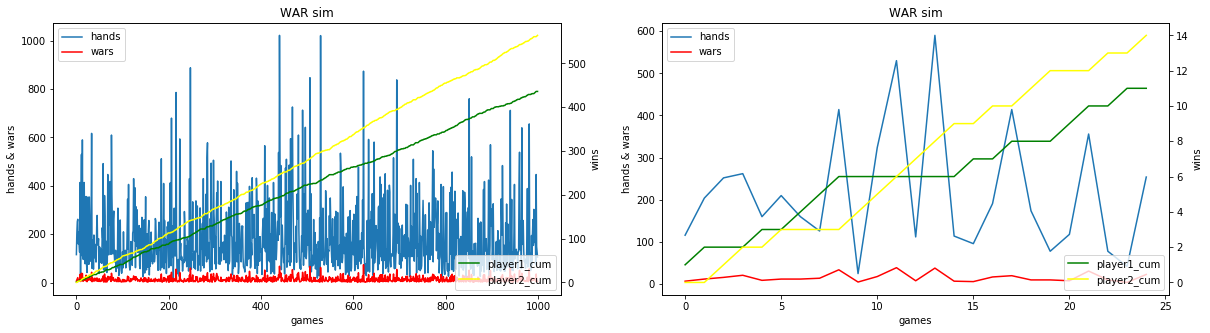

In [33]:
# optionally graph the results

data = pd.read_csv('war_sim.csv')
data['player1_cum'] = data['player1'].cumsum()
data['player2_cum'] = data['player2'].cumsum()
data.index.name = 'games'

# print(data.head(10))

fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(121)
ax1.set_ylabel('hands & wars')
ax12 = ax1.twinx()
ax12.set_ylabel('wins')

data.plot(kind='line',use_index=True,y='hands', ax=ax1, title='WAR sim')
data.plot(kind='line',use_index=True,y='wars', color='red', ax=ax1)
data.plot(kind='line',use_index=True,y='player1_cum', color='green', ax=ax12)
data.plot(kind='line',use_index=True,y='player2_cum', color='yellow', ax=ax12)
ax1.legend(loc='upper left')
ax12.legend(loc='lower right')

# less data plot
ax2 = fig.add_subplot(122)
ax2.set_ylabel('hands & wars')
ax22 = ax2.twinx()
ax22.set_ylabel('wins')

data2 = data.head(25)
data2.plot(kind='line',use_index=True,y='hands', ax=ax2, title='WAR sim')
data2.plot(kind='line',use_index=True,y='wars', color='red', ax=ax2)
data2.plot(kind='line',use_index=True,y='player1_cum', color='green', ax=ax22)
data2.plot(kind='line',use_index=True,y='player2_cum', color='yellow', ax=ax22)
ax2.legend(loc='upper left')
ax22.legend(loc='lower right')

plt.show();
fig.savefig('war-plots.jpg', dpi=fig.dpi)